[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1Rk0siC8VQTDihV79hMqJEajSWQ3asS8S#scrollTo=QnSqsCoOiCEh)

[Caso Practico](https://drive.google.com/file/d/1o9wyxE6ROBGJAPUh3iYsCB-tQ0PpTuJI/view?usp=sharing)


*La empresa que está haciendo un estudio de los principales
lugares de inversión de bienes raíces, necesita saber cuál es el precio
medio de las casas para su posterior venta*


El conjunto de datos de vivienda de Boston se deriva de la información recopilada por el Servicio del Censo de EE. UU. sobre viviendas en el área de Boston MA. A continuación se describen las columnas del conjunto de datos:

| Campo | Descripcion |
|--------------|--------------|
|CRIM | tasa de criminalidad per cápita por ciudad|
|ZN| proporción de suelo residencial zonificado para lotes de más de 25.000 pies cuadrados|
|INDUS| proporción de acres de negocios no minoristas por ciudad|
|CHAS| Variable ficticia de Charles River (1 si el tramo limita con el río; 0 en caso contrario)|
|NOX | concentración de óxidos nítricos (partes por 10 millones|
|RM | número medio de habitaciones por vivienda|
|EDAD| proporción de unidades ocupadas por sus propietarios construidas antes de 1940|
|DIS| distancias ponderadas a cinco centros de empleo de Boston|
|RAD| índice de accesibilidad a carreteras radiales|
|IMPUESTO| tasa de impuesto a la propiedad de valor total por $10,000|
|PTRATIO | ratio alumnos-maestro por ciudad|
|Negros|B - 1000(Bk - 0,63)^2 donde Bk es la proporción de negros por ciudad|
|LSTAT | % de estatus inferior de la población|
|MEDV | Valor medio de viviendas ocupadas por sus propietarios en miles de dólares (precio)|

---

## **Configuración Inicial**

**Conexion Drive**

In [1]:
# Si necesitas ejecutar el notebook con un archivo desde tu drive personal
# from google.colab import drive
# drive.mount('/gdrive')

# Repositorios
# path = '/gdrive/MyDrive/BQ - Data Science/BQ - Repositorios/Repositorio_Portafolio/'
# filename = "bostonvivienda.csv"
# fullpath = os.path.join(path, filename)

**Librerias**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Para los graficos tengan las mismas dimensiones
%matplotlib inline
plt.style.use('ggplot')
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
#plt.rcParams['figure.figsize'] = (7, 4)

pd.options.display.max_columns = None
sns.set_style('whitegrid')
color = sns.color_palette()

**Rutas**

In [4]:
fullpath = 'https://raw.githubusercontent.com/bryanOsmar07/personal-projects-portafolio/main/Data/bostonvivienda.csv'

## Anexos

In [46]:
import numpy as np
import pandas as pd
import graphviz, IPython
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from matplotlib.ticker import FuncFormatter
from sklearn.tree import export_graphviz

def draw_tree(tree, df):
    s = export_graphviz(tree, out_file=None, feature_names=df.columns, filled=True)
    return graphviz.Source(s)

def set_rf_samples(n):
    """ Changes Scikit learn's random forests to give each tree a random sample of
    n random rows.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n))

def reset_rf_samples():
    """ Undoes the changes produced by set_rf_samples.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n_samples))

# Based on https://github.com/chrispaulca/waterfall.git
def waterfallplot(sample, data, Title="", x_lab="", y_lab="",
		 formatting="{:,.1f}", green_color='#29EA38', red_color='#FB3C62', blue_color='#24CAFF',
		 sorted_value=False, threshold=None, other_label='other', net_label='net',
		 rotation_value=0, size=None):
	'''
	Given two sequences ordered appropriately, generate a standard waterfall chart.
	Optionally modify the title, axis labels, number formatting, bar colors,
	increment sorting, and thresholding. Thresholding groups lower magnitude changes
	into a combined group to display as a single entity on the chart.
	'''

	#convert data and index to np.array
	index = np.array([f'{c}\n({sample[c].iloc[0]})' for c in sample])
	data = np.array(data)

	# wip
	#sorted by absolute value
	if sorted_value:
		abs_data = abs(data)
		data_order = np.argsort(abs_data)[::-1]
		data = data[data_order]
		index = index[data_order]

	#group contributors less than the threshold into 'other'
	if threshold:

		abs_data = abs(data)
		threshold_v = abs_data.max()*threshold

		if threshold_v > abs_data.min():
			index = np.append(index[abs_data>=threshold_v],other_label)
			data = np.append(data[abs_data>=threshold_v],sum(data[abs_data<threshold_v]))

	changes = {'amount' : data}

	#define format formatter
	def money(x, pos):
		'The two args are the value and tick position'
		return formatting.format(x)
	formatter = FuncFormatter(money)

	fig, ax = plt.subplots(figsize=size)
	ax.yaxis.set_major_formatter(formatter)

	#Store data and create a blank series to use for the waterfall
	trans = pd.DataFrame(data=changes,index=index)
	blank = trans.amount.cumsum().shift(1).fillna(0)

	trans['positive'] = trans['amount'] > 0

	#Get the net total number for the final element in the waterfall
	total = trans.sum().amount
	trans.loc[net_label]= total
	blank.loc[net_label] = total

	#The steps graphically show the levels as well as used for label placement
	step = blank.reset_index(drop=True).repeat(3).shift(-1)
	step[1::3] = np.nan

	#When plotting the last element, we want to show the full bar,
	#Set the blank to 0
	blank.loc[net_label] = 0

	#define bar colors for net bar
	trans.loc[trans['positive'] > 1, 'positive'] = 99
	trans.loc[trans['positive'] < 0, 'positive'] = 99
	trans.loc[(trans['positive'] > 0) & (trans['positive'] < 1), 'positive'] = 99

	trans['color'] = trans['positive']

	trans.loc[trans['positive'] == 1, 'color'] = green_color
	trans.loc[trans['positive'] == 0, 'color'] = red_color
	trans.loc[trans['positive'] == 99, 'color'] = blue_color

	my_colors = list(trans.color)

	#Plot and label
	my_plot = plt.bar(range(0,len(trans.index)), blank, width=0.5, color='white')
	plt.bar(range(0,len(trans.index)), trans.amount, width=0.6,
			 bottom=blank, color=my_colors)


	# connecting lines - figure out later
	#my_plot = lines.Line2D(step.index, step.values, color = "gray")
	#my_plot = lines.Line2D((3,3), (4,4))

	#axis labels
	plt.xlabel("\n" + x_lab)
	plt.ylabel(y_lab + "\n")

	#Get the y-axis position for the labels
	y_height = trans.amount.cumsum().shift(1).fillna(0)

	temp = list(trans.amount)

	# create dynamic chart range
	for i in range(len(temp)):
		if (i > 0) & (i < (len(temp) - 1)):
			temp[i] = temp[i] + temp[i-1]

	trans['temp'] = temp

	plot_max = trans['temp'].max()
	plot_min = trans['temp'].min()

	#Make sure the plot doesn't accidentally focus only on the changes in the data
	if all(i >= 0 for i in temp):
		plot_min = 0
	if all(i < 0 for i in temp):
		plot_max = 0

	if abs(plot_max) >= abs(plot_min):
		maxmax = abs(plot_max)
	else:
		maxmax = abs(plot_min)

	pos_offset = maxmax / 40

	plot_offset = maxmax / 15 ## needs to me cumulative sum dynamic

	#Start label loop
	loop = 0
	for index, row in trans.iterrows():
		# For the last item in the list, we don't want to double count
		if row['amount'] == total:
			y = y_height[loop]
		else:
			y = y_height[loop] + row['amount']
		# Determine if we want a neg or pos offset
		if row['amount'] > 0:
			y += (pos_offset*2)
			plt.annotate(formatting.format(row['amount']),(loop,y),ha="center", color = 'g', fontsize=9)
		else:
			y -= (pos_offset*4)
			plt.annotate(formatting.format(row['amount']),(loop,y),ha="center", color = 'r', fontsize=9)
		loop+=1

	#Scale up the y axis so there is room for the labels
	plt.ylim(plot_min-round(3.6*plot_offset, 7),plot_max+round(3.6*plot_offset, 7))

	#Rotate the labels
	plt.xticks(range(0,len(trans)), trans.index, rotation=rotation_value)

	#add zero line and title
	plt.axhline(0, color='black', linewidth = 0.6, linestyle="dashed")
	plt.title(Title)
	plt.tight_layout()

	return plt

In [47]:
def calculate_vif(X, used_cols):
    VIF = []
    for col in used_cols:
        cols = used_cols.copy()
        cols.remove(col)
        model = LinearRegression().fit(X[:, cols], X[:, col])
        VIF.append(1 / (1 - model.score(X[:, cols], X[:, col])))

    return VIF

# Lectura de datos

In [5]:
df = pd.read_csv(fullpath)

In [6]:
print(df.shape)
df.head(3)

(506, 13)


,crim,zn,indus,nox,rm,edad,dis,rad,impuesto,ptratio,negro,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


# Data Wrangling

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   crim      506 non-null    float64
 1   zn        506 non-null    float64
 2   indus     506 non-null    float64
 3   nox       506 non-null    float64
 4   rm        506 non-null    float64
 5   edad      506 non-null    float64
 6   dis       506 non-null    float64
 7   rad       506 non-null    int64  
 8   impuesto  506 non-null    int64  
 9   ptratio   506 non-null    float64
 10  negro     506 non-null    float64
 11  lstat     506 non-null    float64
 12  medv      506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


In [9]:
df.duplicated().any()

False

In [10]:
# Validando registros únicos
print(df.shape)
print(df.nunique())

(506, 13)
crim        504
zn           26
indus        76
nox          81
rm          446
edad        356
dis         412
rad           9
impuesto     66
ptratio      46
negro       357
lstat       455
medv        229
dtype: int64


# **I. Analisis Exploratorio**

In [11]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
edad,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
impuesto,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000
ptratio,506.0,18.455534,2.164946,12.60000,17.400000,19.05000,20.200000,22.0000


## Revision Objetivo

MEDV - Valor medio de viviendas ocupadas por sus propietarios en miles de dólares (precio)

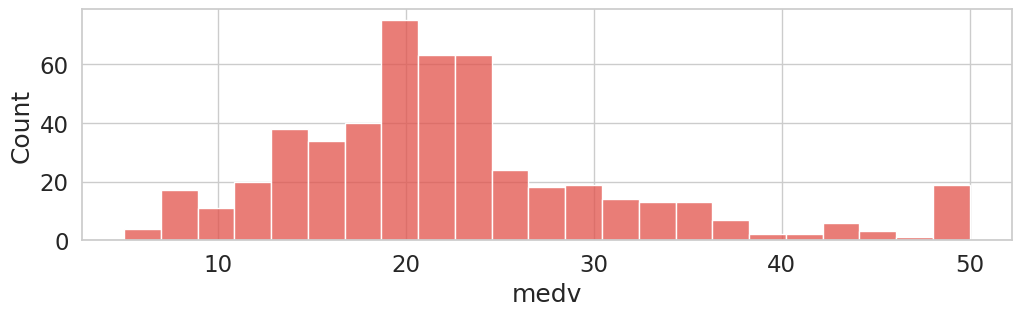

In [12]:
plt.figure(figsize=(12,3))
sns.histplot(x='medv', data=df);

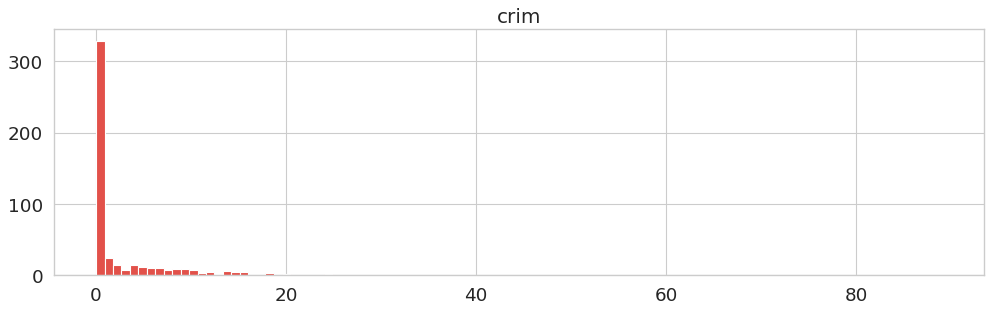

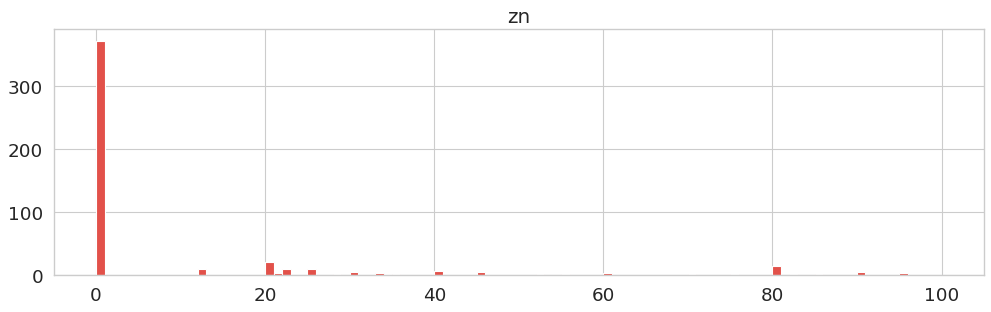

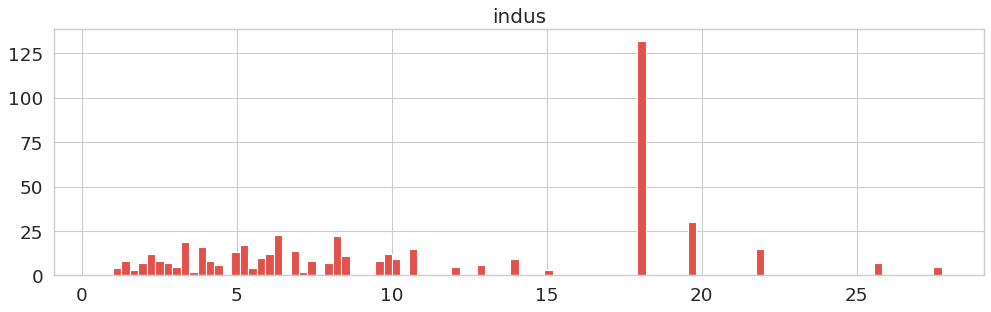

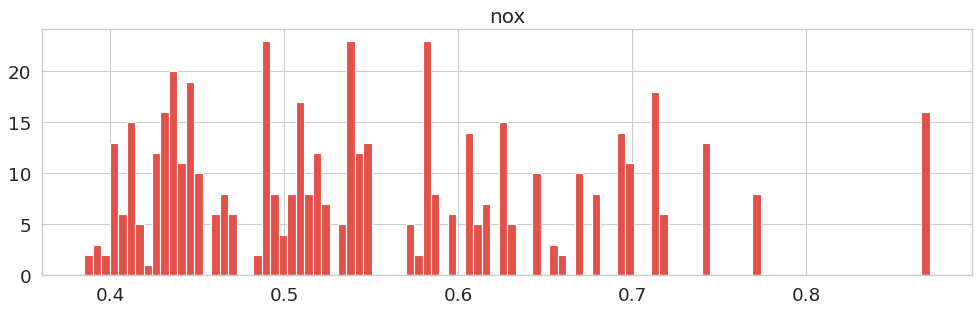

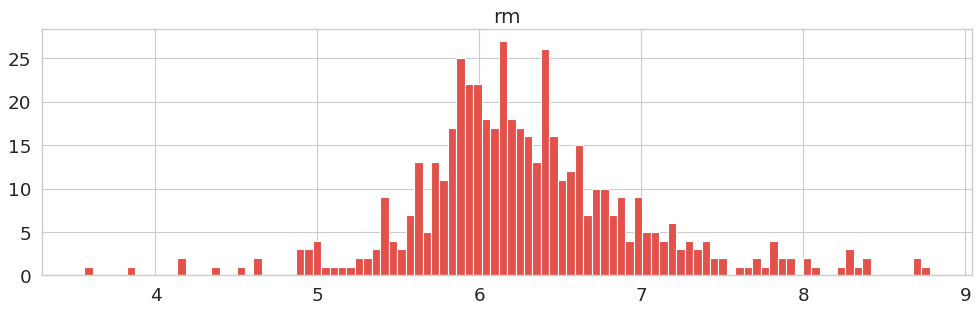

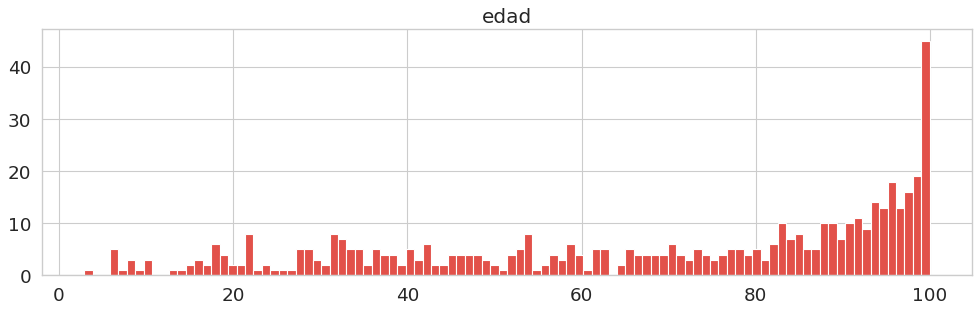

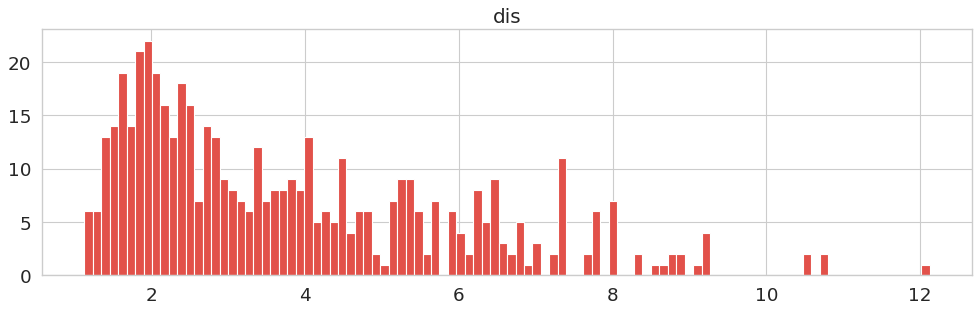

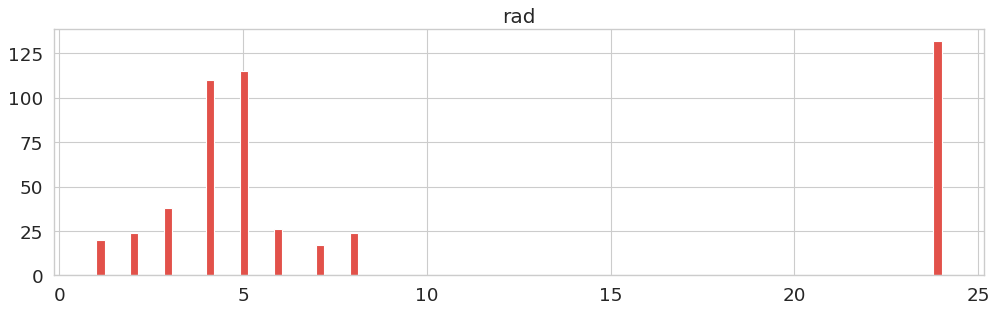

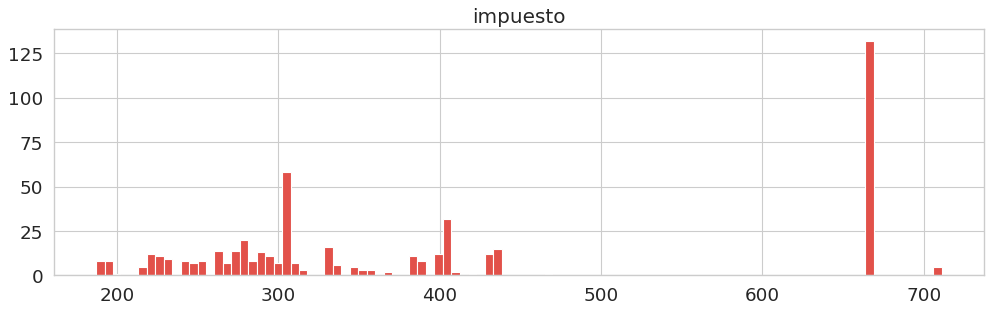

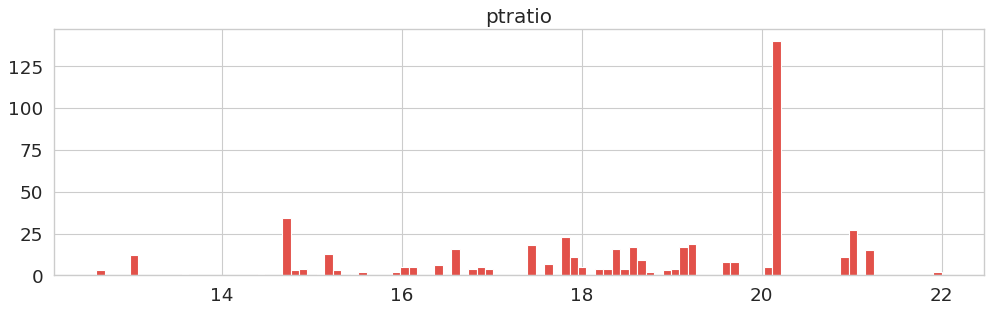

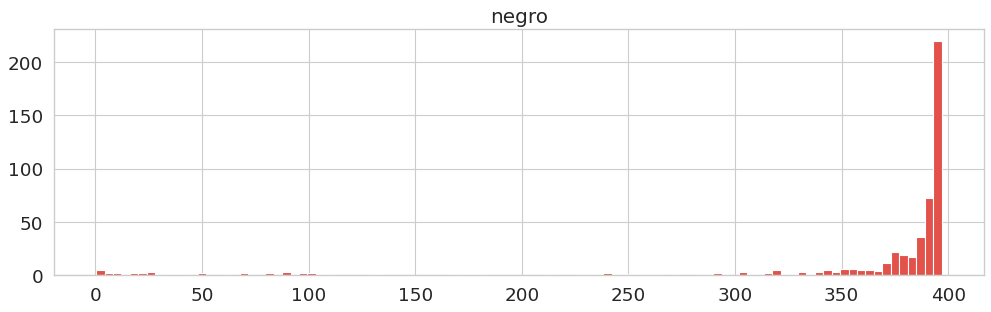

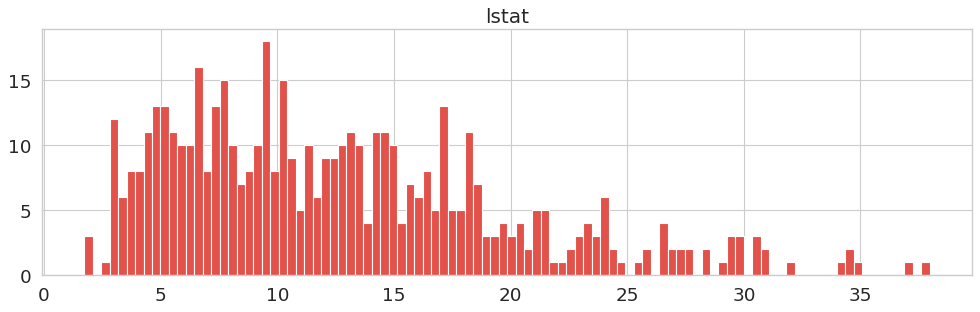

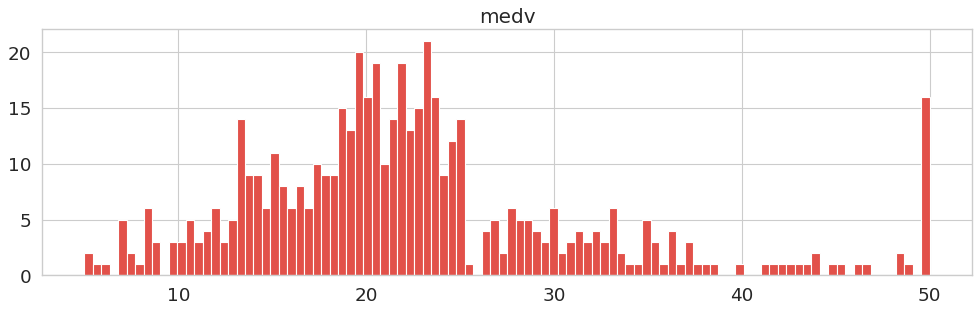

In [13]:
for x in df.columns:
  plt.figure(figsize=(15,4), dpi=80)
  plt.title(df[x].name)
  plt.hist(df[x],bins=100)
  plt.show()

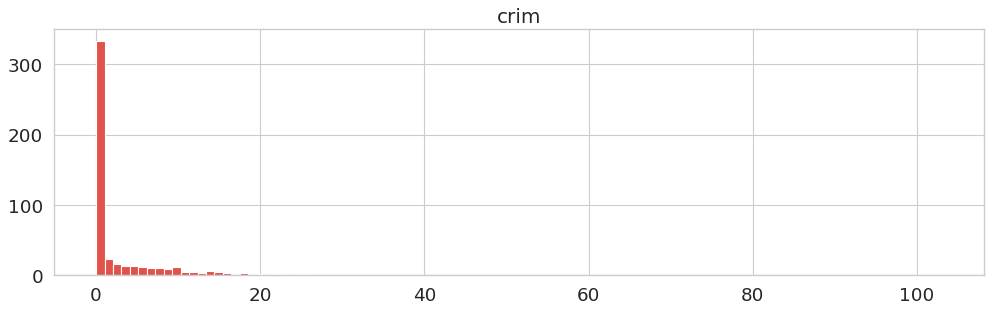

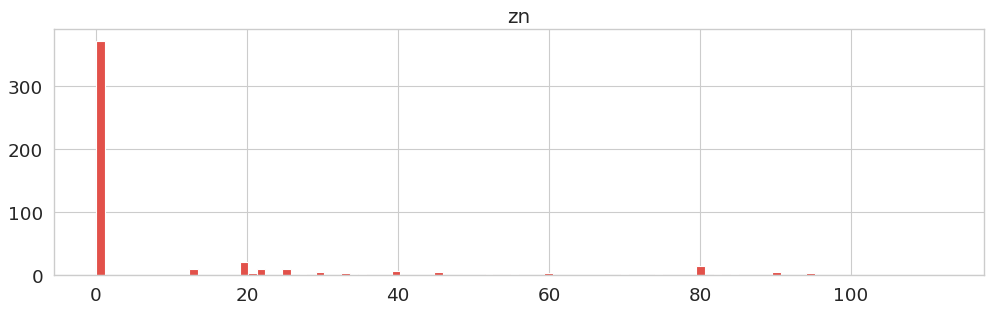

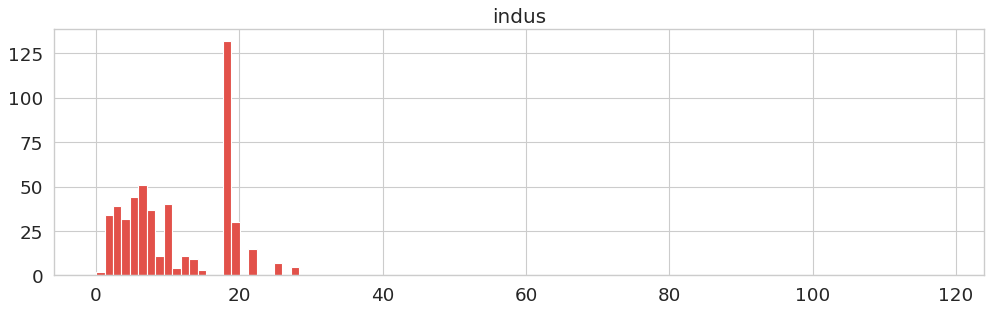

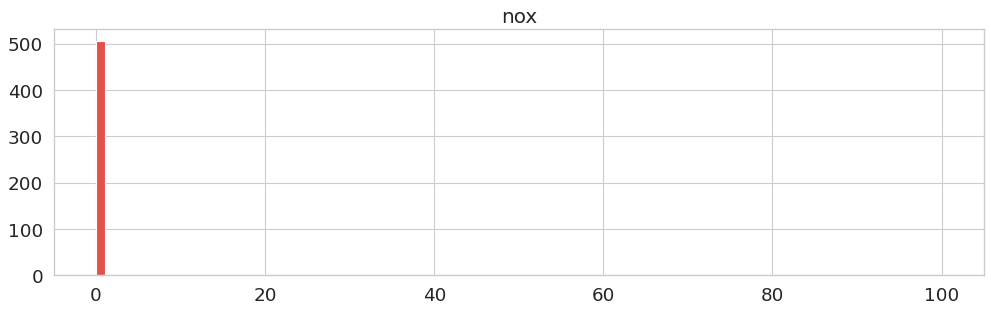

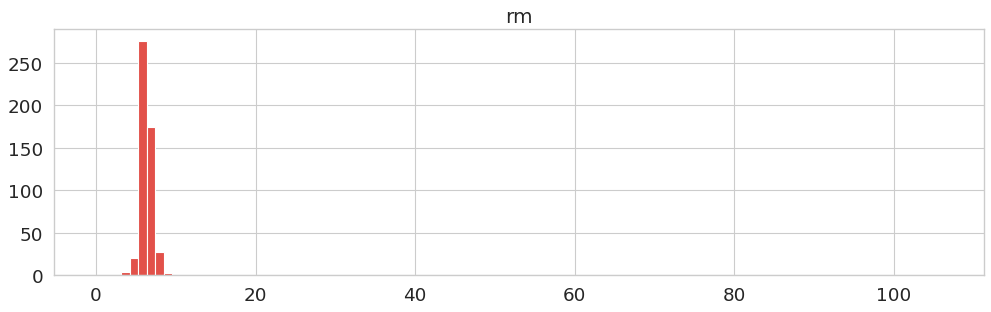

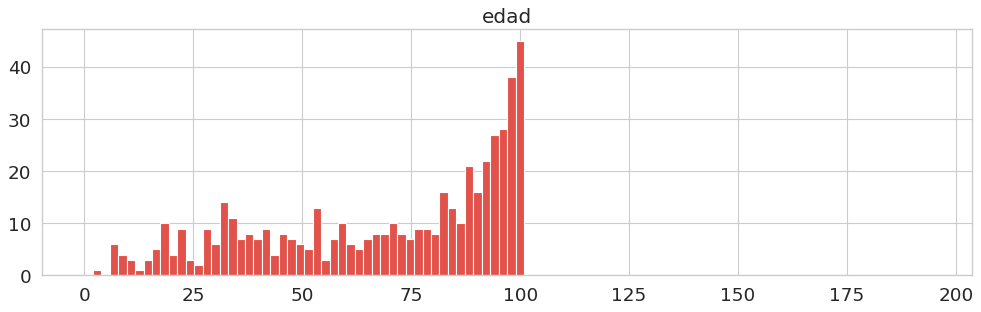

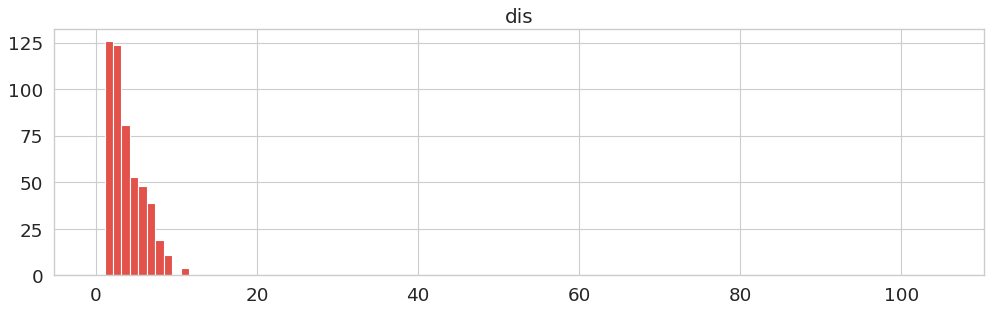

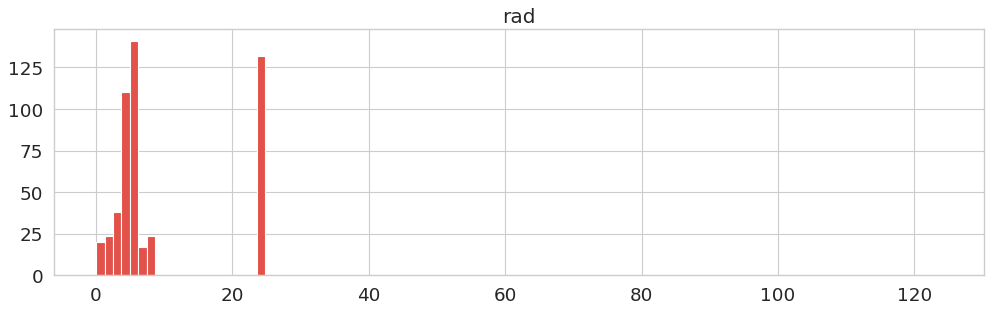

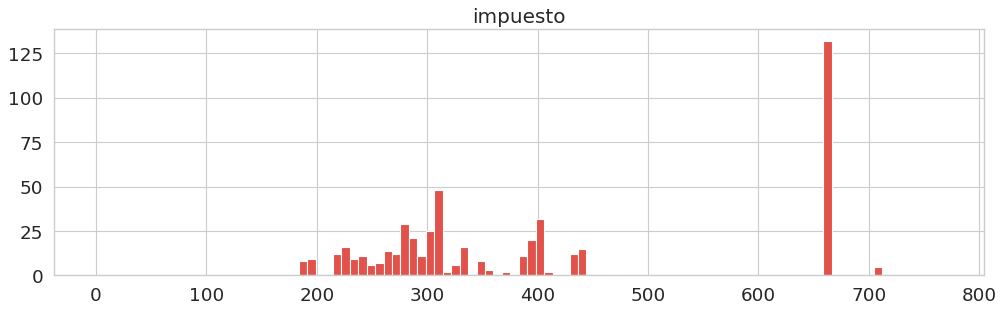

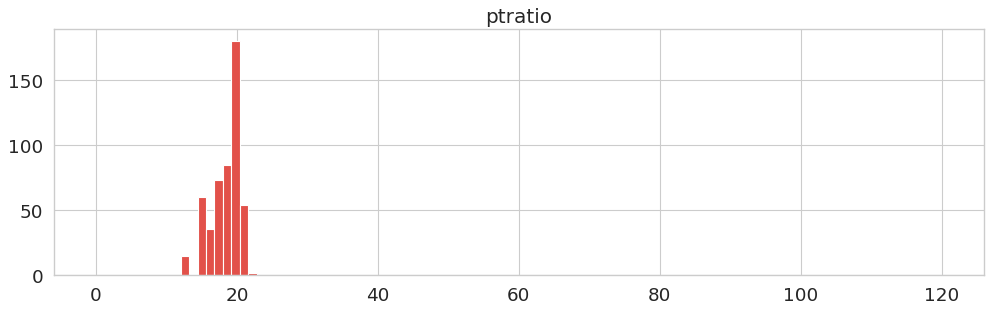

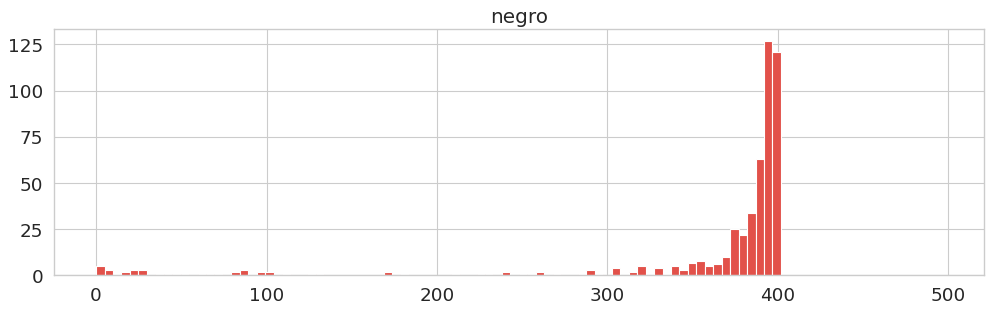

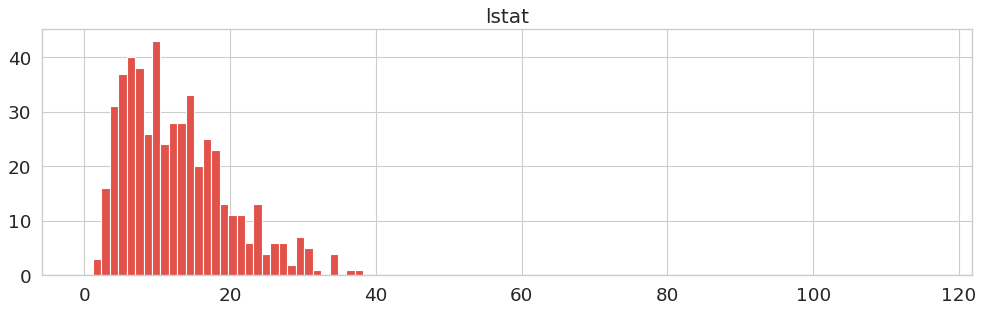

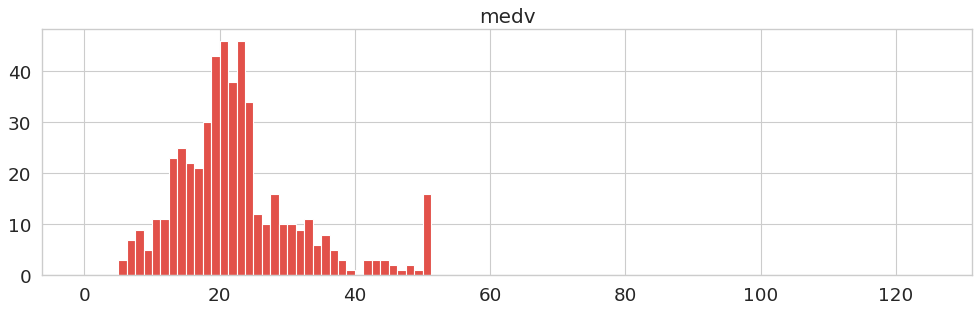

In [14]:
# No consideramos las colas (outliers) para ver mejor la distribucion
for x in df.columns:
  plt.figure(figsize=(15,4), dpi=80)
  Q03= int(df[x].quantile(0.75))+100
  plt.title(df[x].name)
  plt.hist(df[x],bins=100,range=(0,Q03))
  plt.show()

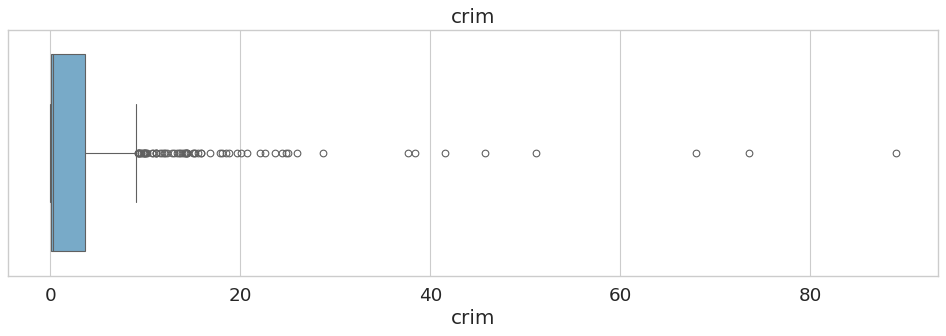

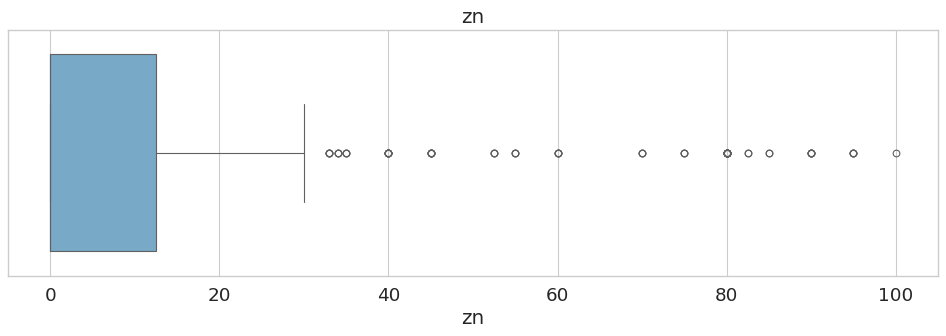

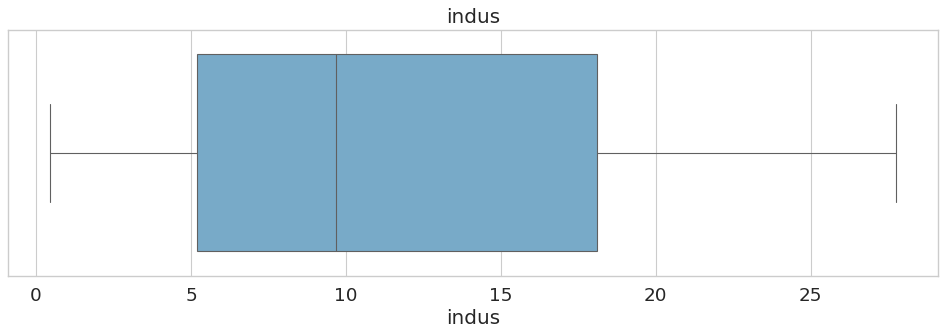

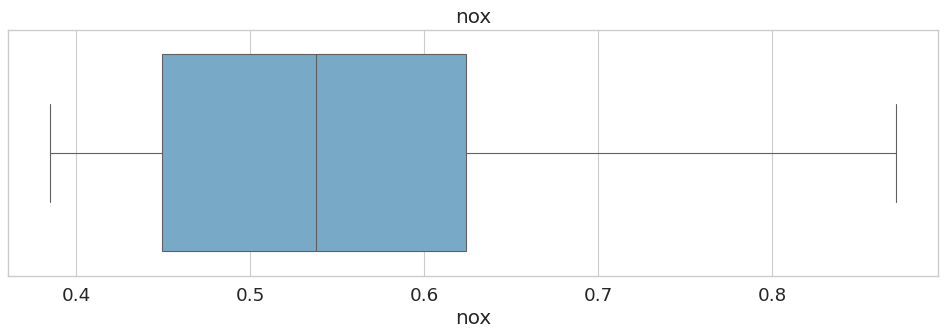

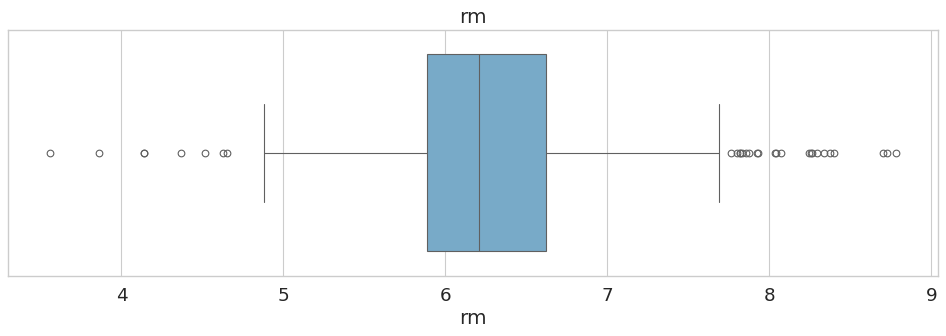

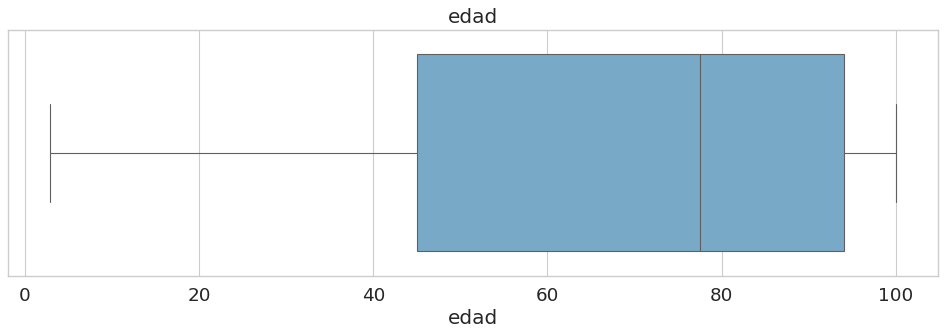

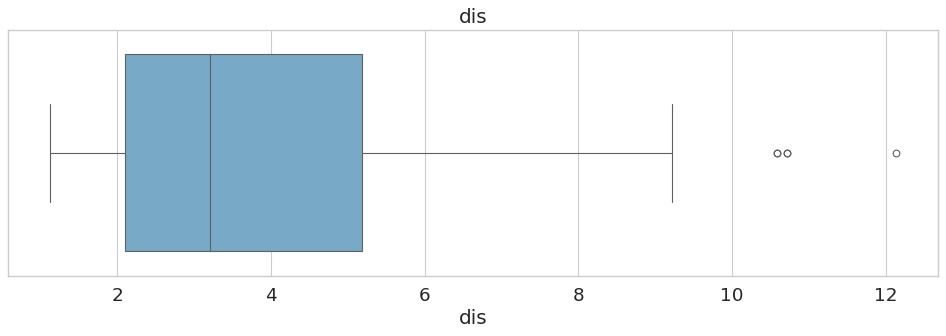

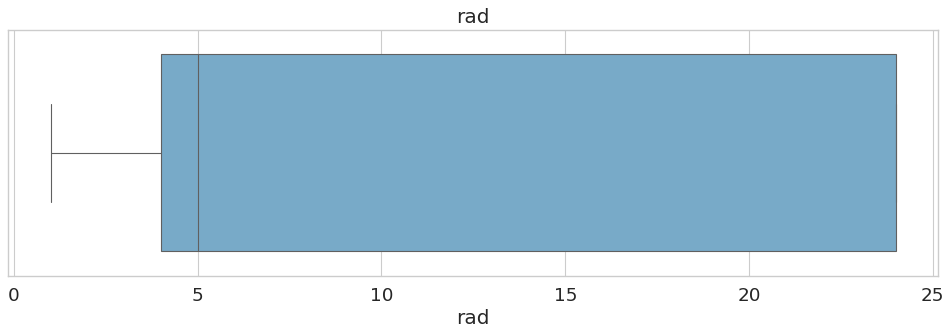

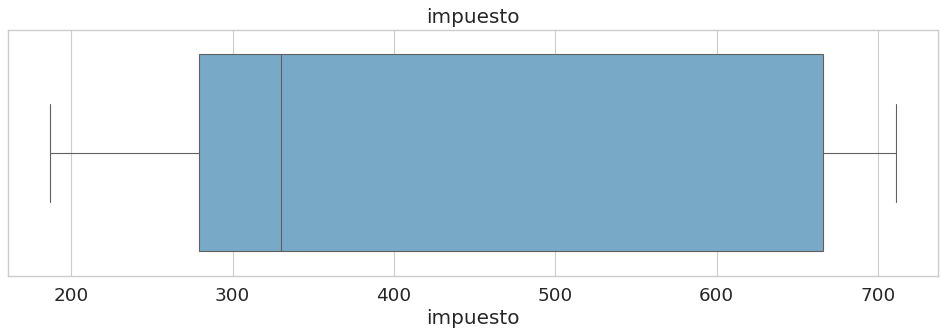

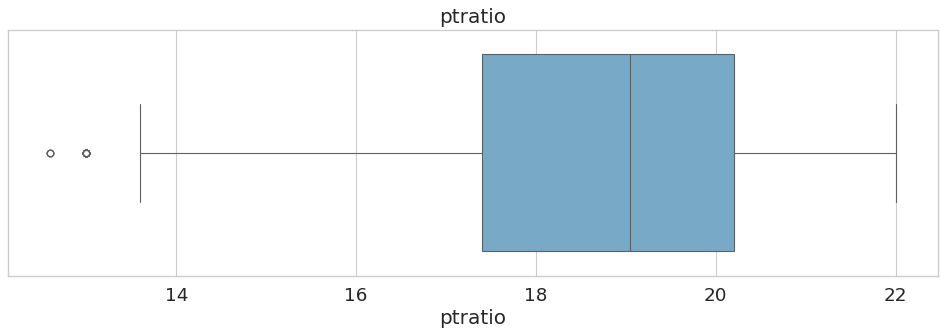

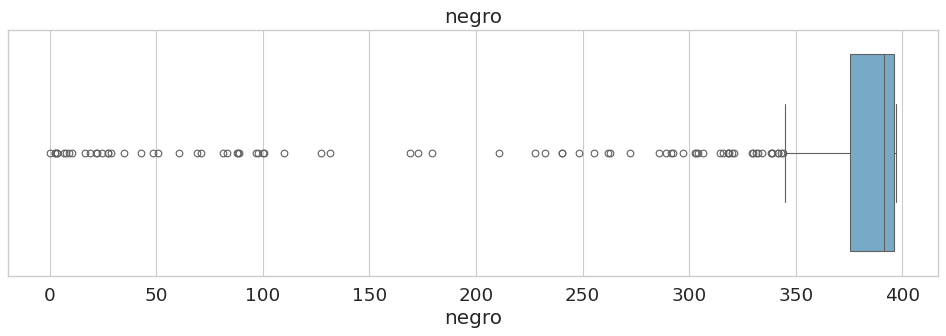

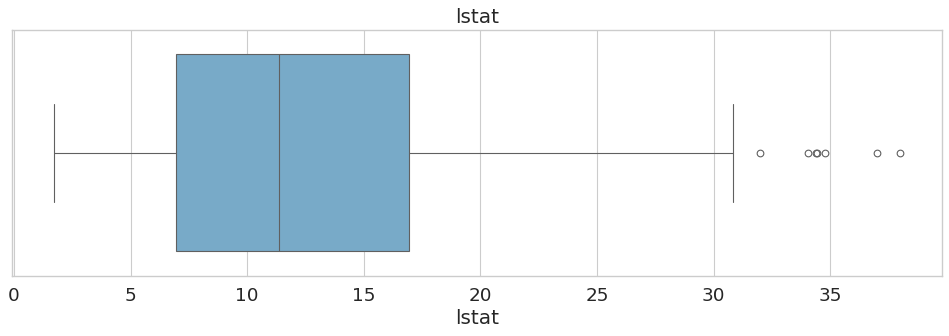

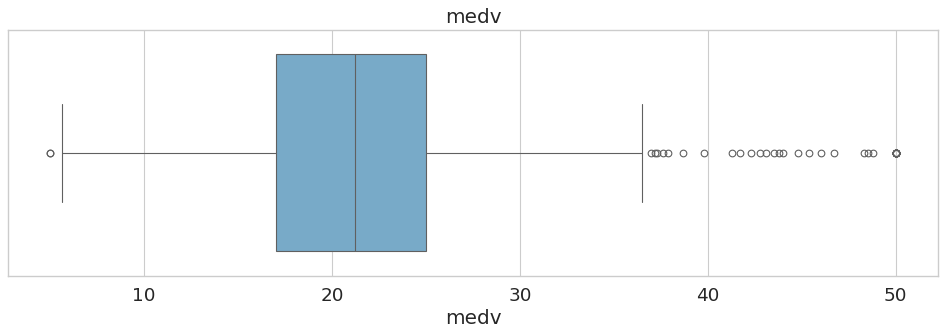

In [15]:
# Grafico de Cajas para revision de atipicos
for x in df.columns:
  plt.figure(figsize=(15,4), dpi=80)
  plt.title(df[x].name)
  sns.boxplot(x=df[x], palette="Blues")
  plt.show()

## Analisis Multivariado

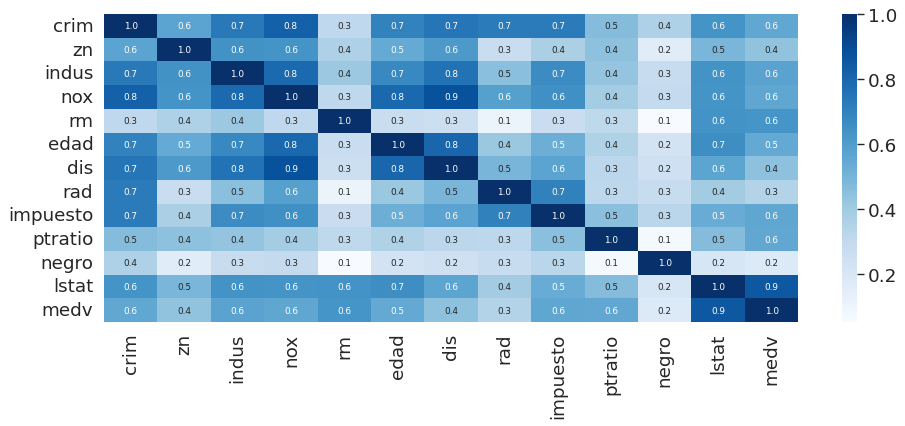

In [16]:
# Analizamos la correlacion de las variables
# Spearman: Para variables numericas. No asume normalidad
plt.figure(figsize=(14,5), dpi=80)
sns.heatmap(abs(df.corr(method='spearman')),annot=True,fmt='.1f',cbar=True,annot_kws={'size':8},cmap='Blues')
plt.show()

## Linealidad

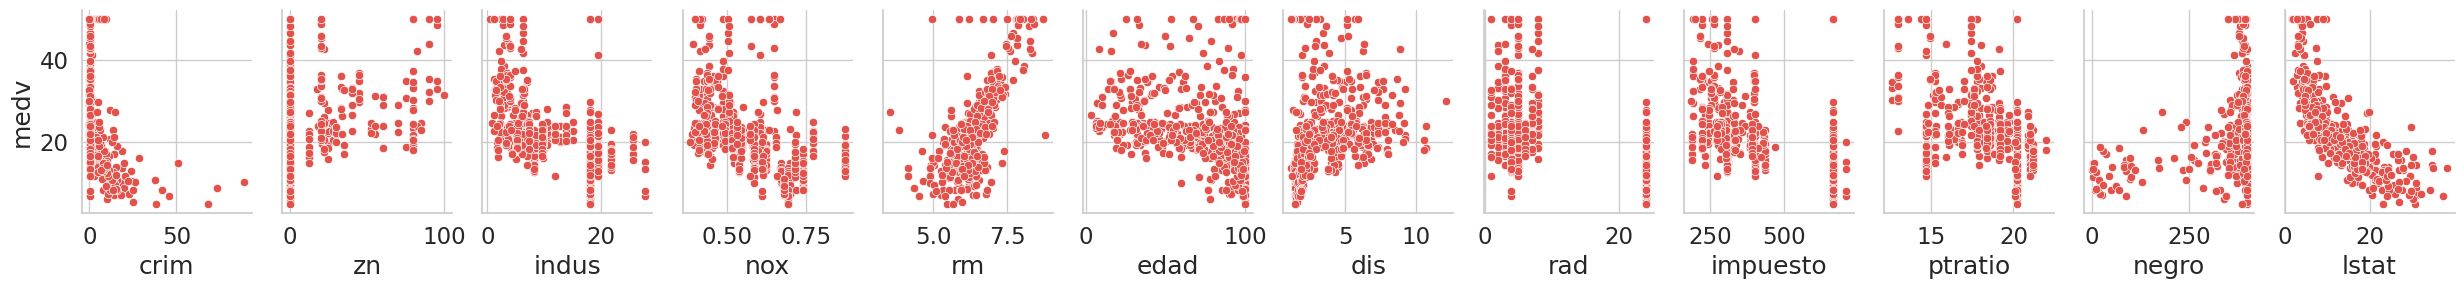

In [17]:
# Linealidad
p = sns.pairplot(df, x_vars = ['crim','zn','indus','nox','rm','edad','dis','rad','impuesto','ptratio','negro','lstat',],
                 y_vars='medv', size=3, aspect=0.7)

* Se cumple el supuesto de Linealidad? ==> solo con rm (numero de habitaciones por vivienda)
* Existe relación lineal entre el precio de las casas y las demás variables? no, solo con rm
* Para algunas variables existiría relación de tipo lineal.

<Axes: >

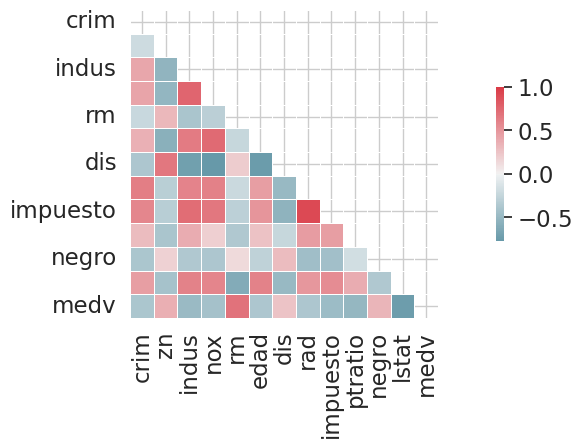

In [20]:
# Multicolinealidad
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 4))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

* Hay una relacion fuerte e inversa con lstat (estatus bajo de la poblacion)

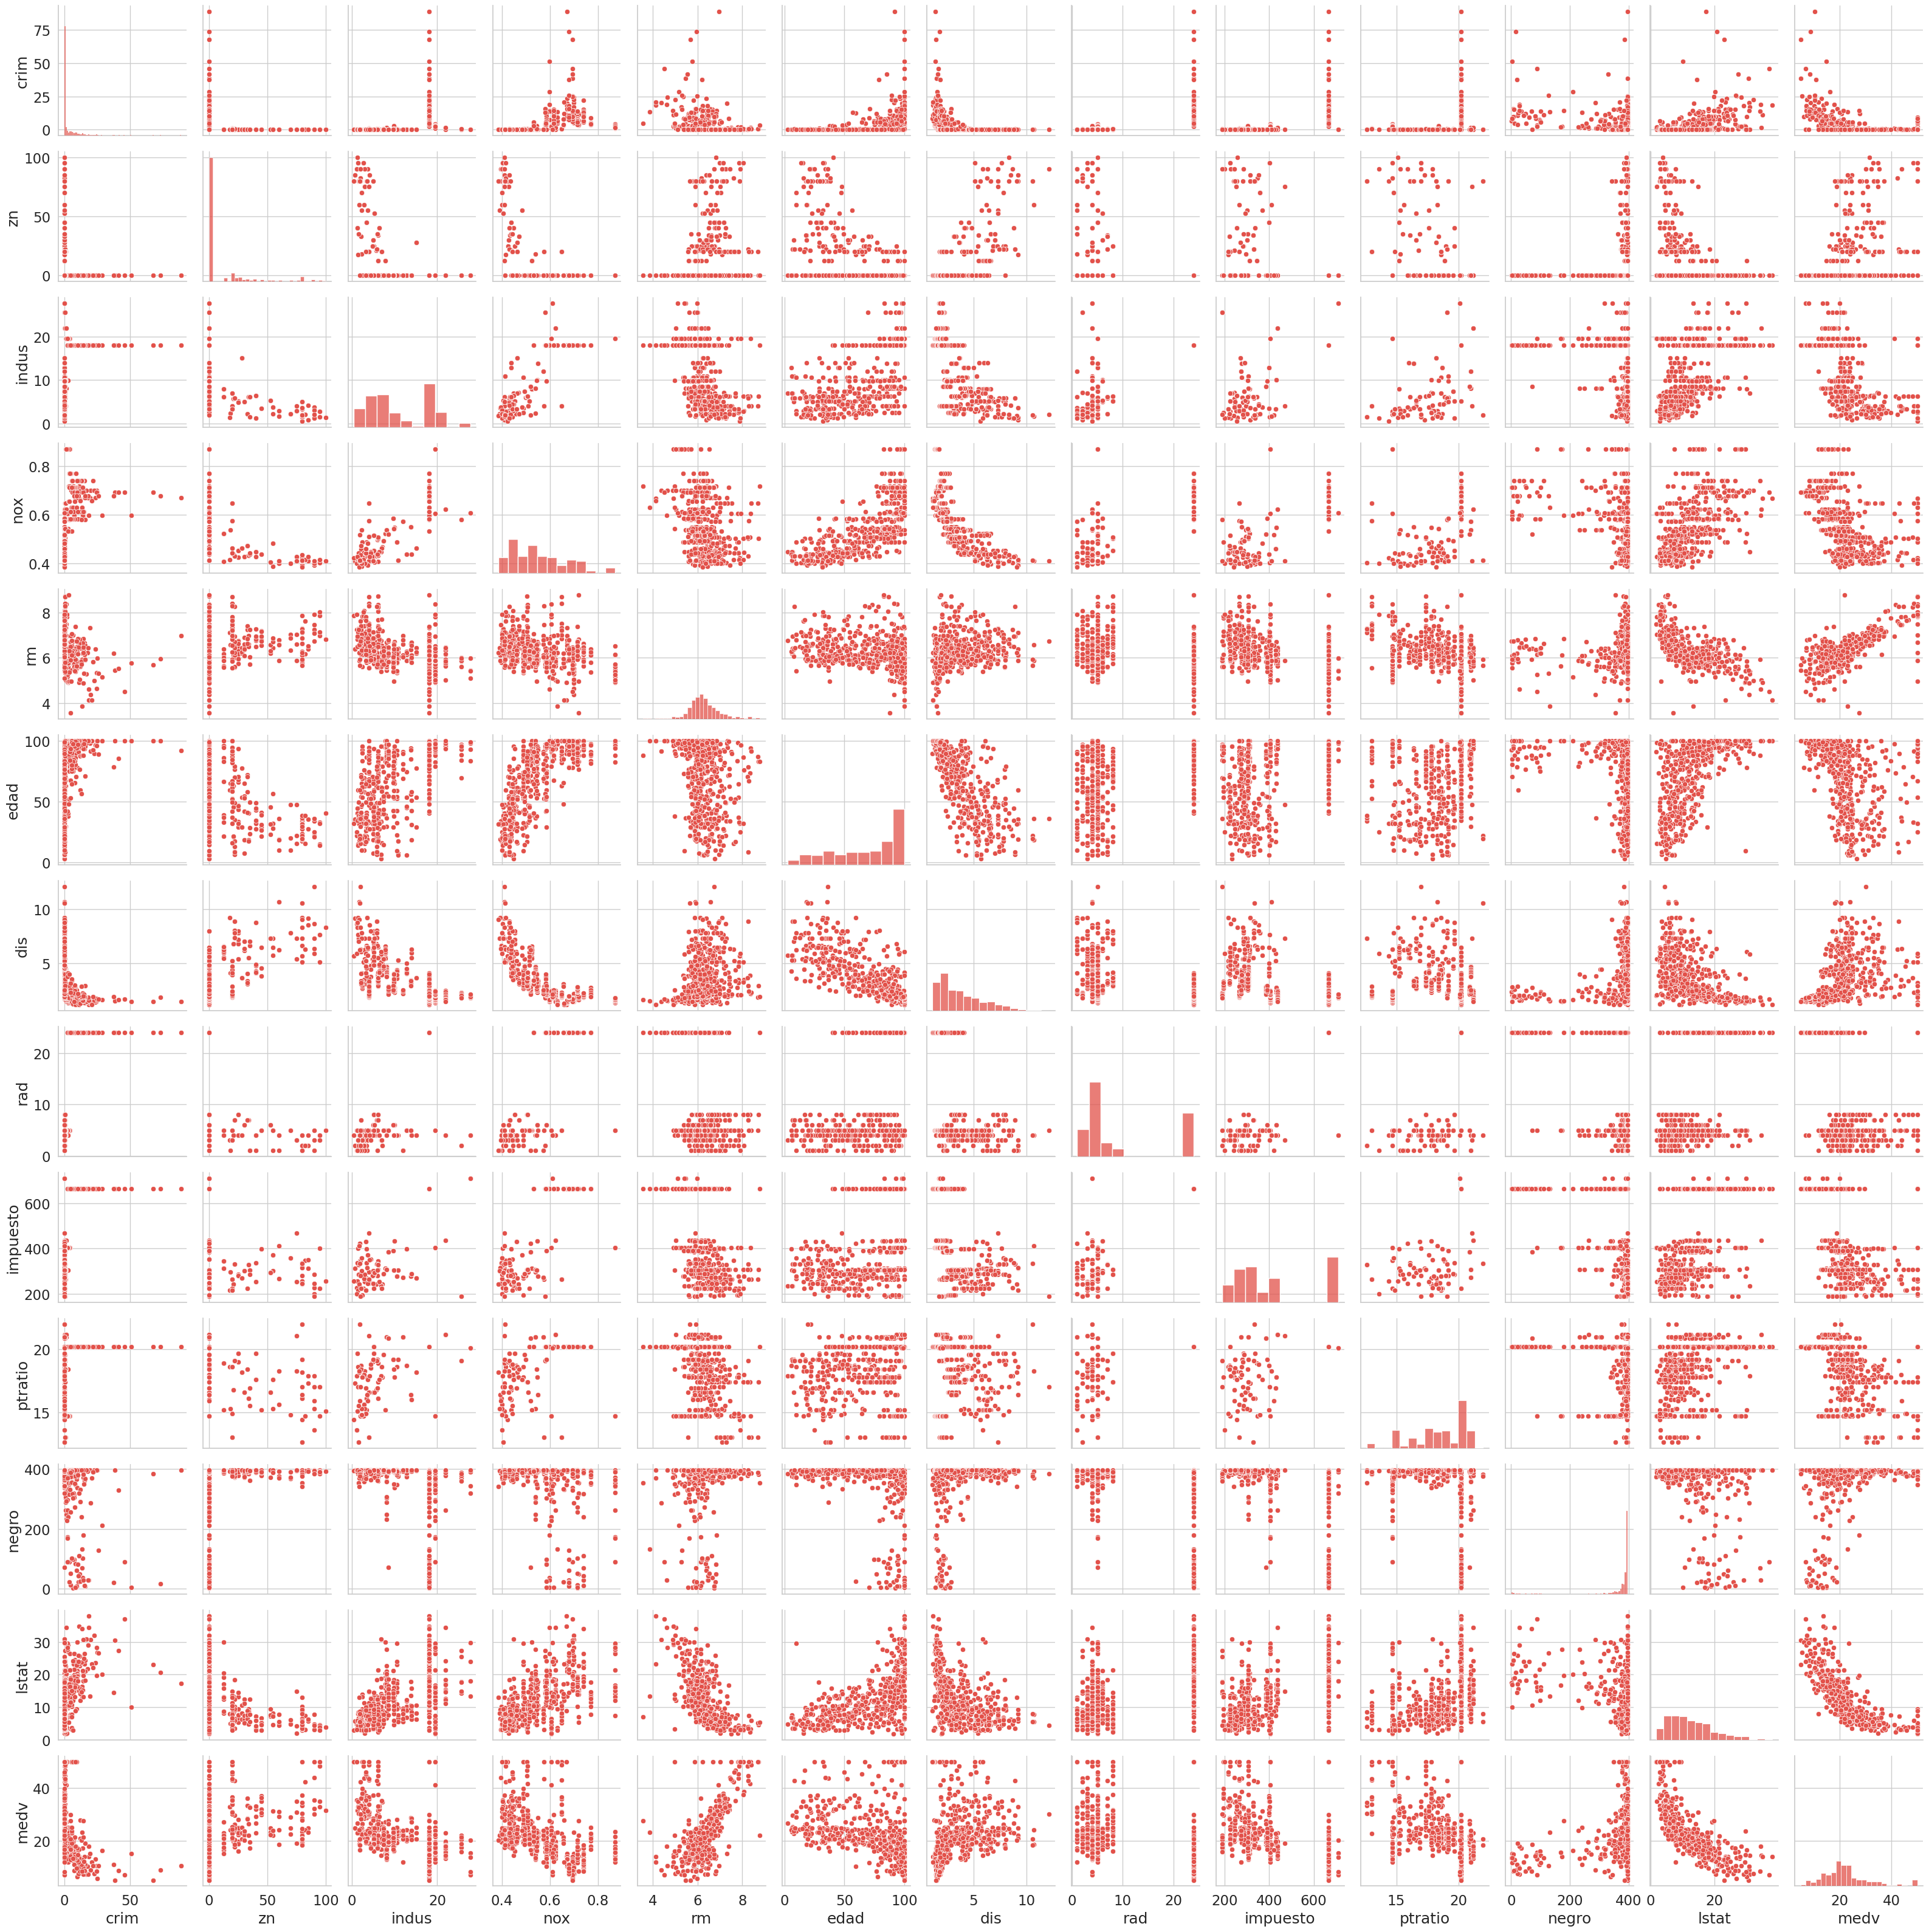

In [21]:
# Relaciones entre variables y distribuciones!
sns.pairplot(df)

**Cómo podemos solucionar la Multicolinealidad?**

* Seleccionando variables.
* VIF o criterio de inflacion de la varianza. (se quita el mayor VIF)
* Usar metodologias de Regresión Penalizadas.

### VIF

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns
vif

,VIF Factor,features
0,2.129411,crim
1,2.909895,zn
2,14.337913,indus
3,73.714583,nox
4,135.901404,rm
5,21.342085,edad
6,15.421320,dis
7,15.255396,rad
8,61.295071,impuesto
9,86.772609,ptratio


# **II. Seleccion de variables**

In [24]:
X = df.drop('medv',axis=1)
Y = df.medv

## Random Forest

In [25]:
# Seleccion por Random Forest
from sklearn.ensemble import RandomForestRegressor

In [26]:
forest = RandomForestRegressor()
forest.fit(X, Y)
importances = forest.feature_importances_

In [27]:
# Seleccion por Random Forest
TablaImportancia = pd.concat([pd.DataFrame({'Driver':list(X.columns)}),
                              pd.DataFrame({'Importancia':list(forest.feature_importances_)})], axis = 1)
ImportanciaVariables = TablaImportancia[['Driver','Importancia']].sort_values('Importancia', ascending = False).reset_index(drop = True)
ImportanciaVariables

,Driver,Importancia
0,rm,0.445174
1,lstat,0.362584
2,dis,0.064055
3,crim,0.035798
4,nox,0.023808
5,ptratio,0.017258
6,impuesto,0.016144
7,edad,0.013435
8,negro,0.011104
9,indus,0.005729


In [28]:
# Seleccionas las variables mas importantes! (a partir de random forest)
X=X[['rm','lstat','dis','crim','nox','ptratio','impuesto']]
print(X.shape)
X.head(3)

(506, 7)


,rm,lstat,dis,crim,nox,ptratio,impuesto
0,6.575,4.98,4.0900,0.00632,0.538,15.3,296
1,6.421,9.14,4.9671,0.02731,0.469,17.8,242
2,7.185,4.03,4.9671,0.02729,0.469,17.8,242


# **III. Modelado**

### Particion Muestral

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# Creación de la data de train y la data de test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.33,
                                                    random_state=2021)

## Regresión Lineal

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
reg_multiple = LinearRegression()
reg_multiple.fit(X_train,y_train)

LinearRegression()

In [33]:
print(pd.Series(reg_multiple.coef_, index = X_train.columns).sort_values(ascending = False)) # Pintamos los coeficientes

rm           4.438624
impuesto     0.002010
crim        -0.088964
lstat       -0.660021
ptratio     -0.964996
dis         -1.309669
nox        -15.860044
dtype: float64


In [34]:
# La ordenada en el origen o intercepto lo calculan por fuera!
reg_multiple.intercept_

34.10191924857783

Entonces el moodelo para predecir las casas toma la siguiente forma:

* PrecioCasas = 34.10 + 4.43*rm +0.002 * impuesto + .............. -15.860 * nox


**Interpretaciones:**

* Para B0 = 34.10 ; El precio de las casas es 34.10 x 1000 cuando todas las demas variables son 0. (No siempre se interpreta éste coeficiente)
* Para B1 = 4.43 ; Por cada habitación adicional en la casa, el precio de ésta aumenta en 4.43x1000.
* Para B7= -15.86 ; Por cada incremento en una unidad de la concentracion de oxido de nitrogeno, el precio de las casas se decrementa en -15.86 x 1000.

In [35]:
# Validamos nuestros resultados en el train y en el test!
y_pred_train = reg_multiple.predict(X_train)
y_pred_test = reg_multiple.predict(X_test)

In [36]:
# el R2 indica el % de la explicacion del precio de las casas dado por las covariables
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred_train)))
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=y_pred_test)))

R squared: 0.7240152552832739
R squared: 0.6467915809058375


* Coeficiente de determinacion, es el % de Y que es explicada por X.
* El 64% de la variabilidad del precio de las casas, es explicado por las variables que integran la solucion analitica. Hay un poco de sobre ajuste

In [37]:
# Obtenemos las funciones de coste (error cuadratico medio)
print("ECM: {}".format(mean_squared_error(y_train,y_pred_train)))
print("ECM: {}".format(mean_squared_error(y_test,y_pred_test)))

ECM: 26.270070974377965
ECM: 21.89455668289887


* Error cuadratico medio, cuanto nos estamos equivocando

In [38]:
# Obtenemos las funciones de coste (roor mean )
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_train,y_pred_train))))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,y_pred_test))))

RMSE: 5.125433735244068
RMSE: 4.679161963738685


**Raiz del error cuadratico**
* El modelo se desvia aprox 4600 dolares del valor real

#### Supuestos

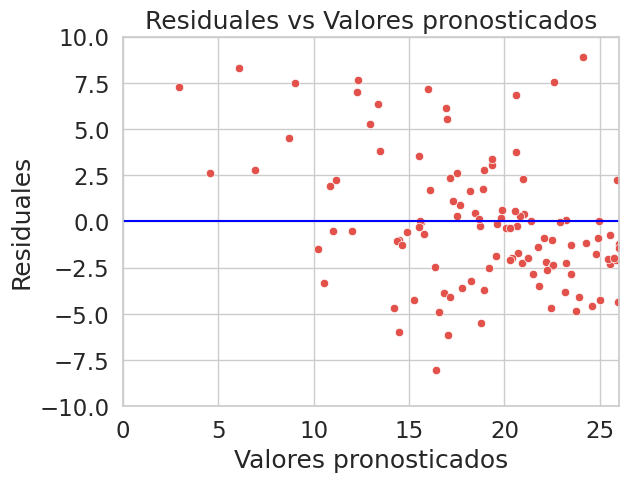

In [39]:
# Homocedasticidad
residuals = y_test.values-y_pred_test
p = sns.scatterplot(x = y_pred_test,y = residuals)
plt.xlabel('Valores pronosticados')
plt.ylabel('Residuales')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot(x = [0,26],y = [0,0],color='blue')
p = plt.title('Residuales vs Valores pronosticados')

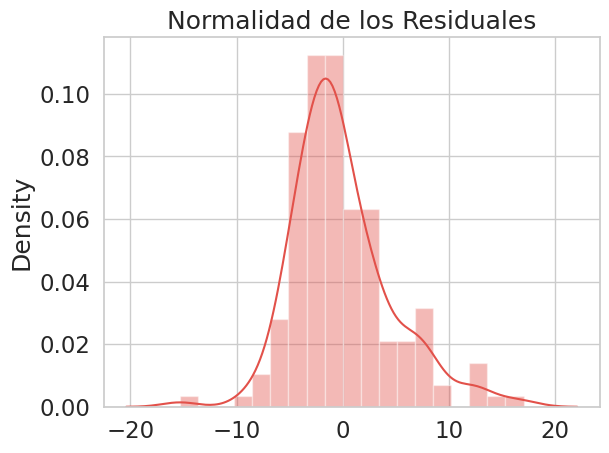

In [40]:
# Normalidad
p = sns.distplot(residuals,kde=True)
p = plt.title('Normalidad de los Residuales')

* Los residuales no necesariamemte tienen distribucion normal

In [41]:
# importancia de las variables y la contribucion de estas!
imp = pd.DataFrame({'Nombre_Variable':X_train.columns,
                    'Importancia':(np.absolute(reg_multiple.coef_))}).sort_values(
    'Importancia', ascending=False)
imp.style.bar()

,Nombre_Variable,Importancia
4,nox,15.860044
0,rm,4.438624
2,dis,1.309669
5,ptratio,0.964996
1,lstat,0.660021
3,crim,0.088964
6,impuesto,0.002010


In [42]:
X_test.head()

,rm,lstat,dis,crim,nox,ptratio,impuesto
210,5.960,17.27,3.8771,0.17446,0.489,18.6,277
24,5.924,16.30,4.3996,0.75026,0.538,21.0,307
36,5.841,11.41,3.3779,0.09744,0.499,19.2,279
439,5.627,22.88,1.8172,9.39063,0.740,20.2,666
161,7.489,1.73,1.9709,1.46336,0.605,14.7,403


In [43]:
pd.DataFrame(X_test.iloc[0].rename('Valor_Variable'))

,Valor_Variable
rm,5.96000
lstat,17.27000
dis,3.87710
crim,0.17446
nox,0.48900
ptratio,18.60000
impuesto,277.00000


In [44]:
# contribuciones de las variables!
x0 = pd.DataFrame(X_test.iloc[0].rename('Valor_Variable'))
x0['Nombre_Variable'] = x0.index
x0 = pd.merge(x0, imp, on='Nombre_Variable')
x0['Contribucion'] = x0.Valor_Variable * x0.Importancia
x0.sort_values('Contribucion', ascending=False).style.bar(['Contribucion'])

,Valor_Variable,Nombre_Variable,Importancia,Contribucion
0,5.960000,rm,4.438624,26.454201
5,18.600000,ptratio,0.964996,17.948922
1,17.270000,lstat,0.660021,11.398565
4,0.489000,nox,15.860044,7.755561
2,3.877100,dis,1.309669,5.077717
6,277.000000,impuesto,0.002010,0.556640
3,0.174460,crim,0.088964,0.015521


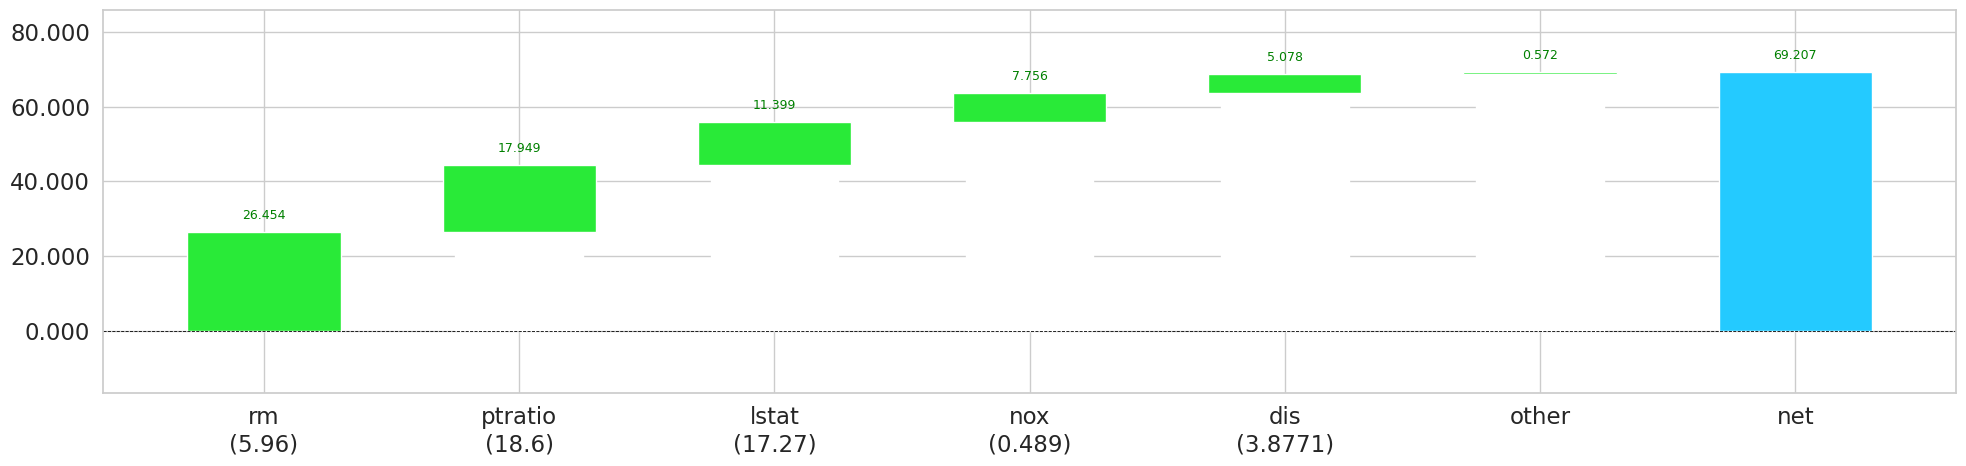

In [48]:
# contribucion de cada variable sobre el objetivo! (para cada persona)
# Persona 1
waterfallplot(X_test.head(1), x0.Contribucion, formatting='{:,.3f}', size=(20,5), sorted_value=True, threshold=0.05);

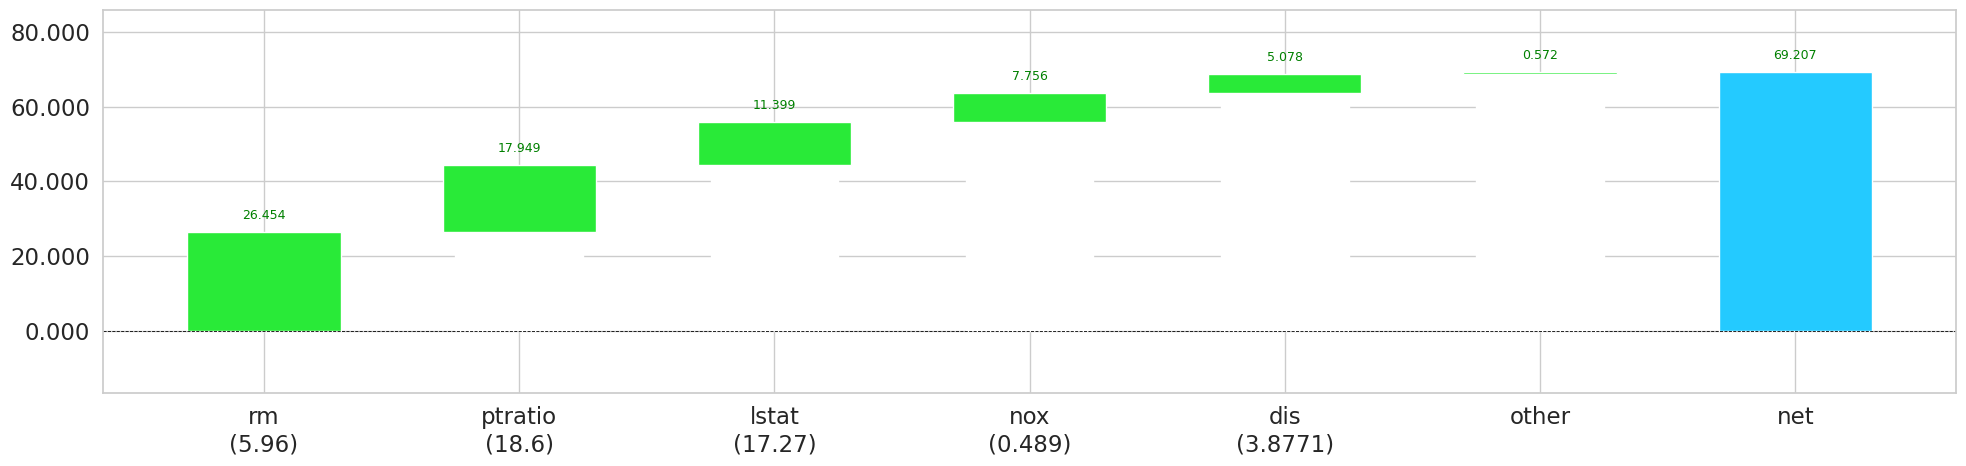

In [49]:
# Persona 5
waterfallplot(X_test.head(5), x0.Contribucion, formatting='{:,.3f}', size=(20,5), sorted_value=True, threshold=0.05);

## RL Stats Model

In [50]:
import statsmodels.api as sm

In [51]:
# Fit and summarize OLS model
mod = sm.OLS(y_train,X_train)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                   medv   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              969.9
Date:                Sun, 16 Jun 2024   Prob (F-statistic):                   9.32e-217
Time:                        05:58:23   Log-Likelihood:                         -1050.3
No. Observations:                 339   AIC:                                      2115.
Df Residuals:                     332   BIC:                                      2141.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [52]:
# importancia de las variables y la contribucion de estas!
imp = pd.DataFrame({'Nombre_Variable':X_train.columns,
                    'Importancia':(np.absolute(res.params))}).sort_values(
    'Importancia', ascending=False)
imp.style.bar()

,Nombre_Variable,Importancia
rm,rm,6.522142
nox,nox,0.798991
dis,dis,0.651804
lstat,lstat,0.574268
ptratio,ptratio,0.388178
crim,crim,0.100652
impuesto,impuesto,0.001820


In [53]:
# contribuciones de las variables!
x0 = pd.DataFrame(X_test.iloc[0].rename('Valor_Variable'))
x0['Nombre_Variable'] = x0.index
x0 = pd.merge(x0, imp, on='Nombre_Variable')
x0['Contribucion'] = x0.Valor_Variable * x0.Importancia
x0.sort_values('Contribucion', ascending=False).style.bar(['Contribucion'])

,Valor_Variable,Nombre_Variable,Importancia,Contribucion
0,5.960000,rm,6.522142,38.871965
1,17.270000,lstat,0.574268,9.917602
5,18.600000,ptratio,0.388178,7.220106
2,3.877100,dis,0.651804,2.527110
6,277.000000,impuesto,0.001820,0.504126
4,0.489000,nox,0.798991,0.390706
3,0.174460,crim,0.100652,0.017560


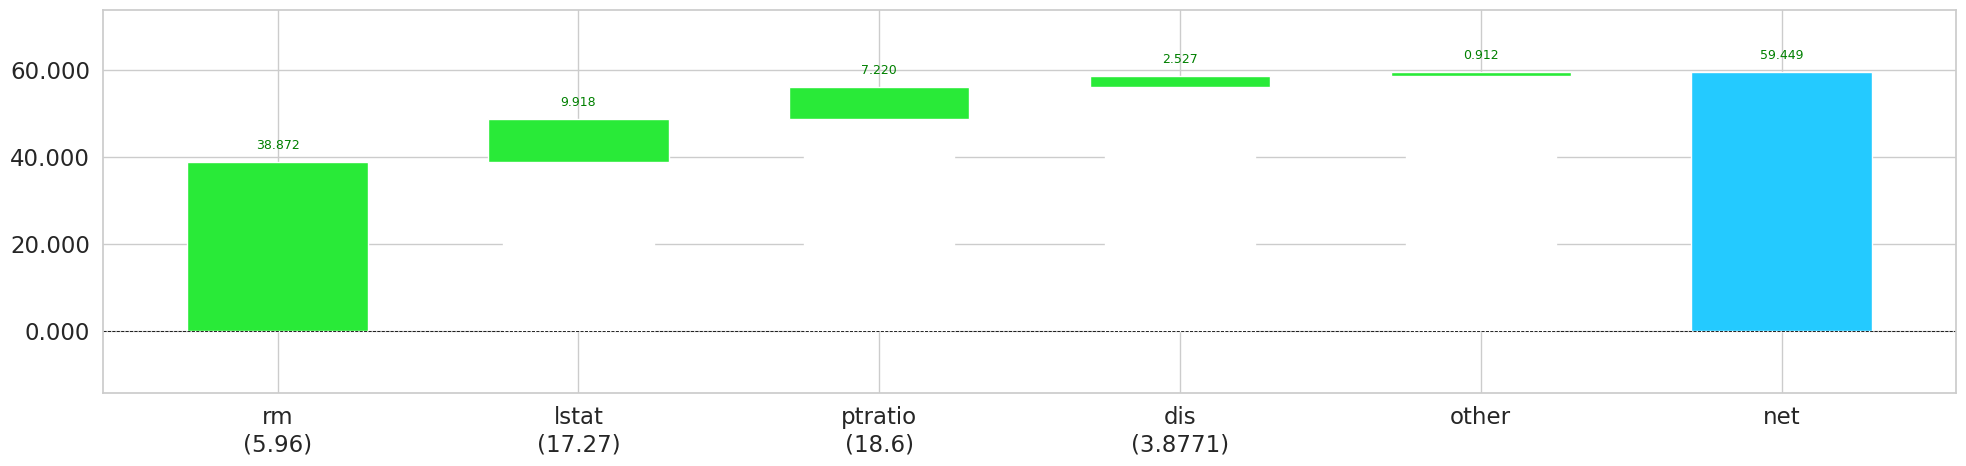

In [54]:
# contribucion de cada variable sobre el objetivo! (para cada persona)
# Persona 1
waterfallplot(X_test.head(1), x0.Contribucion, formatting='{:,.3f}', size=(20,5), sorted_value=True, threshold=0.05);

**Conclusiones**
* Es estadistica
* Hay una fuerte multicolinealidad en los datos
* No todas las variables son significativas
* La regresion de ML es mas robusta que la regresion estadistica

## Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
forest_reg = RandomForestRegressor(max_depth=3,
                                   min_samples_leaf=20,
                                  min_samples_split=40
                                   )
forest_reg.fit(X_train,y_train)

RandomForestRegressor(max_depth=3, min_samples_leaf=20, min_samples_split=40)

In [57]:
# Validamos nuestros resultados en el train y en el test!
y_pred_train_forest = forest_reg.predict(X_train)
y_pred_test_forest =  forest_reg.predict(X_test)

In [58]:
# Obtenemos el valor R cuadrado o Coeficiente de Determinación!
print("R^2: {}".format(r2_score(y_train,y_pred_train_forest)))
print("R^2: {}".format(r2_score(y_test,y_pred_test_forest)))

R^2: 0.8064283682420053
R^2: 0.723027532908445


* R2          = El % de la explicación de Y, dado por todas las variables del modelo!
* R2 Ajustado = El % de la explicación de Y, dado por todas las variables del modelo! (Penaliza por el numero de variables)

In [59]:
# Obtenemos las funciones de coste
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_train,y_pred_train_forest))))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,y_pred_test_forest))))

RMSE: 4.292486522318795
RMSE: 4.143533499135158


* Random forest nos esta arrojando valores mas altos y un error menor, por ende, explica mejor el precio de las casas en funcion de las caracteristicas

### Supuestos

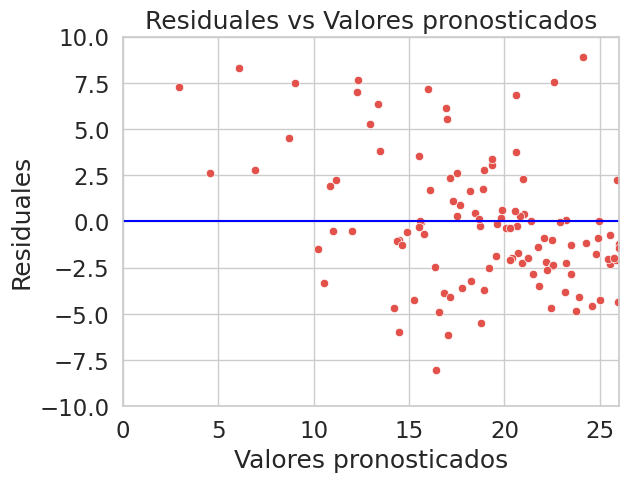

In [60]:
# Homocedasticidad
residuals = y_test.values-y_pred_test
p = sns.scatterplot(x=y_pred_test,y=residuals)
plt.xlabel('Valores pronosticados')
plt.ylabel('Residuales')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot(x=[0,26],y=[0,0],color='blue')
p = plt.title('Residuales vs Valores pronosticados')

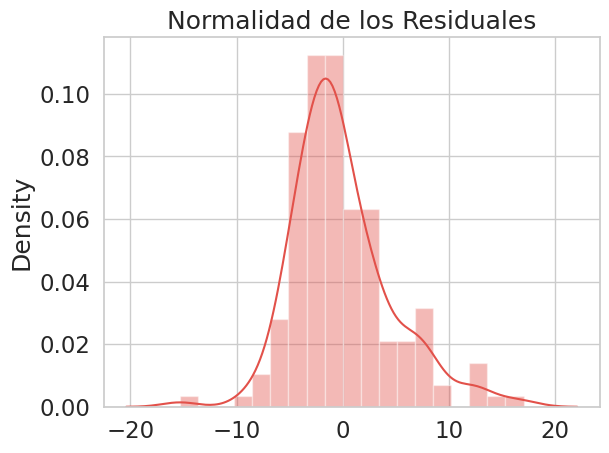

In [61]:
# Normalidad
p = sns.distplot(residuals,kde=True)
p = plt.title('Normalidad de los Residuales')

In [62]:
# medición de regresores!
df_test = pd.concat([X_test,y_test],axis=1)

df_test['y_pred_lineal'] = y_pred_test
df_test['y_pred_rf'] = y_pred_test_forest
df_test.head()

,rm,lstat,dis,crim,nox,ptratio,impuesto,medv,y_pred_lineal,y_pred_rf
210,5.960,17.27,3.8771,0.17446,0.489,18.6,277,21.7,18.916473,16.574183
24,5.924,16.30,4.3996,0.75026,0.538,21.0,307,15.6,15.628530,16.797307
36,5.841,11.41,3.3779,0.09744,0.499,19.2,279,20.0,22.183061,21.294112
439,5.627,22.88,1.8172,9.39063,0.740,20.2,666,12.8,10.870417,12.680676
161,7.489,1.73,1.9709,1.46336,0.605,14.7,403,50.0,40.518603,40.635487


In [63]:
# importancia de las variables y la contribucion de estas!
imp = pd.DataFrame({'Nombre_Variable':X_train.columns,
                    'Importancia':(np.absolute(reg_multiple.coef_))}).sort_values(
    'Importancia', ascending=False)
imp.style.bar()

,Nombre_Variable,Importancia
4,nox,15.860044
0,rm,4.438624
2,dis,1.309669
5,ptratio,0.964996
1,lstat,0.660021
3,crim,0.088964
6,impuesto,0.002010


In [64]:
# contribuciones de las variables!
x0 = pd.DataFrame(X_test.iloc[0].rename('Valor_Variable'))
x0['Nombre_Variable'] = x0.index
x0 = pd.merge(x0, imp, on='Nombre_Variable')
x0['Contribucion'] = x0.Valor_Variable * x0.Importancia
x0.sort_values('Contribucion', ascending=False).style.bar(['Contribucion'])

,Valor_Variable,Nombre_Variable,Importancia,Contribucion
0,5.960000,rm,4.438624,26.454201
5,18.600000,ptratio,0.964996,17.948922
1,17.270000,lstat,0.660021,11.398565
4,0.489000,nox,15.860044,7.755561
2,3.877100,dis,1.309669,5.077717
6,277.000000,impuesto,0.002010,0.556640
3,0.174460,crim,0.088964,0.015521


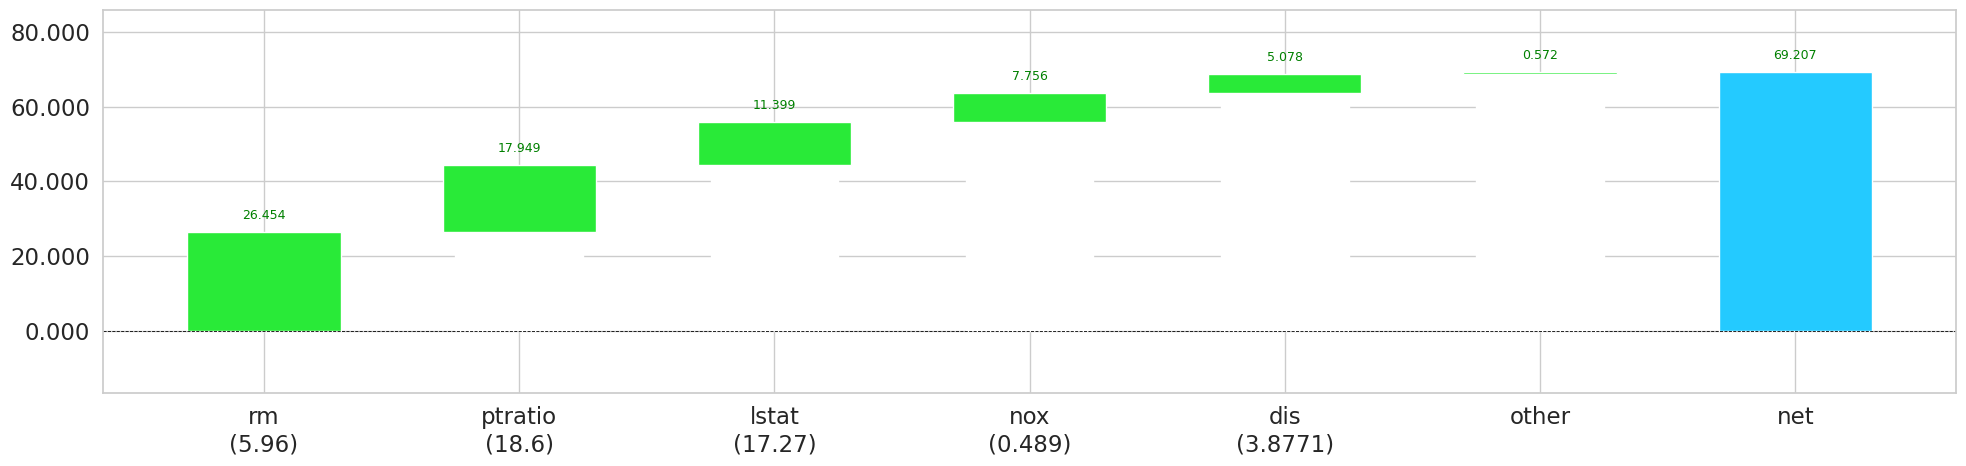

In [65]:
# Ccontribucion de cada variable sobre el objetivo!
waterfallplot(X_test.head(10), x0.Contribucion, formatting='{:,.3f}', size=(20,5), sorted_value=True, threshold=0.05);

In [66]:
# Revisemos la asociacion entre las X's!
X_train.corr()

,rm,lstat,dis,crim,nox,ptratio,impuesto
rm,1.000000,-0.617596,0.229835,-0.211777,-0.340417,-0.359693,-0.344863
lstat,-0.617596,1.000000,-0.512445,0.452531,0.619793,0.380405,0.585180
dis,0.229835,-0.512445,1.000000,-0.375538,-0.777099,-0.218851,-0.541679
crim,-0.211777,0.452531,-0.375538,1.000000,0.389604,0.290770,0.557247
nox,-0.340417,0.619793,-0.777099,0.389604,1.000000,0.168556,0.657547
ptratio,-0.359693,0.380405,-0.218851,0.290770,0.168556,1.000000,0.487989
impuesto,-0.344863,0.585180,-0.541679,0.557247,0.657547,0.487989,1.000000


## Regresión Penalizada : Ridge

In [67]:
from sklearn.preprocessing import scale
from sklearn.linear_model import Ridge, RidgeCV

In [68]:
# Le asignamos un valor pequeño a alpha y observamos que pasa con el error en el test
#ridge = Ridge(alpha = 0.001, normalize = True)
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train, y_train)

Ridge(alpha=0.001)

In [69]:
# Pintamos los coeficientes
print(pd.Series(ridge.coef_, index = X_train.columns).sort_values(ascending = False))

rm           4.438686
impuesto     0.002006
crim        -0.088955
lstat       -0.660069
ptratio     -0.964858
dis         -1.309294
nox        -15.847678
dtype: float64


In [70]:
# Pintamos los coeficientes (parametros reg lineal multiple)
print(pd.Series(reg_multiple.coef_, index = X_train.columns).sort_values(ascending = False))

rm           4.438624
impuesto     0.002010
crim        -0.088964
lstat       -0.660021
ptratio     -0.964996
dis         -1.309669
nox        -15.860044
dtype: float64


* cuando el alpha en ridge es muy pequelo, los parametros de la regresion ridge y la reg multiple Son muy parecidos

In [71]:
# Obtenemos las predicciones
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge  = ridge.predict(X_test)

In [72]:
# Obtenemos las funciones de coste
print ('Error cuadrático medio:')
print('Train:',mean_squared_error(y_train, y_pred_train_ridge))
print('Test:',mean_squared_error(y_test, y_pred_test_ridge),'\n')

print ('Raiz Error cuadrático medio:')
print('Train:',np.sqrt(mean_squared_error(y_train, y_pred_train_ridge)))
print('Test:',np.sqrt(mean_squared_error(y_test, y_pred_test_ridge)),'\n')

print ('R cuadrado:')
print('Train:',r2_score(y_train, y_pred_train_ridge))
print('Test:',r2_score(y_test, y_pred_test_ridge))

Error cuadrático medio:
Train: 26.270071553397553
Test: 21.895135107795557 

Raiz Error cuadrático medio:
Train: 5.125433791729003
Test: 4.679223771930079 

R cuadrado:
Train: 0.7240152492002841
Test: 0.6467822496119328


* los valores son muy parecidos a la regresion lineal multiple (esto debido a que el alpha es muy pequeño)

#### Ridge 2

In [73]:
# Le asignamos un valor grande a alpha y observamos que pasa con el error en el test
ridge2 = Ridge(alpha = 100 )
ridge2.fit(X_train, y_train)

Ridge(alpha=100)

In [74]:
# Pintamos los coeficientes (Lambda= 0.001)
print(pd.Series(ridge.coef_, index = X_train.columns).sort_values(ascending = False))

rm           4.438686
impuesto     0.002006
crim        -0.088955
lstat       -0.660069
ptratio     -0.964858
dis         -1.309294
nox        -15.847678
dtype: float64


In [75]:
# Pintamos los coeficientes (Lambda= 100)
print(pd.Series(ridge2.coef_, index = X_train.columns).sort_values(ascending = False))

rm          2.391545
impuesto   -0.001965
crim       -0.063792
nox        -0.189553
dis        -0.824421
ptratio    -0.849916
lstat      -0.853077
dtype: float64


* alpha = 100 (ridge2) y alpha = 0.0001 (ridge), a mayor alpha, mas penalizador es, por ello el coeficiente es mas pequeño

In [76]:
# Obtenemos las predicciones
y_pred_train_ridge = ridge2.predict(X_train)
y_pred_test_ridge  = ridge2.predict(X_test)

In [77]:
# Obtenemos las funciones de coste
print ('Error cuadrático medio:')
print('Train:',mean_squared_error(y_train, y_pred_train_ridge))
print('Test:',mean_squared_error(y_test, y_pred_test_ridge),'\n')

print ('Raiz Error cuadrático medio:')
print('Train:',np.sqrt(mean_squared_error(y_train, y_pred_train_ridge)))
print('Test:',np.sqrt(mean_squared_error(y_test, y_pred_test_ridge)),'\n')

print ('R cuadrado:')
print('Train:',r2_score(y_train, y_pred_train_ridge))
print('Test:',r2_score(y_test, y_pred_test_ridge))

Error cuadrático medio:
Train: 28.68919647394494
Test: 23.810577286349606 

Raiz Error cuadrático medio:
Train: 5.356229688311074
Test: 4.879608312800281 

R cuadrado:
Train: 0.6986007166591915
Test: 0.6158818612847379


### Ridge 3

In [78]:
# Podemos obtener el mejor valor para el parametro de penalizacion!
alphas = 10**np.linspace(10,-1,100)*0.5

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

np.shape(coefs)

(100, 7)

Text(0, 0.5, 'weights')

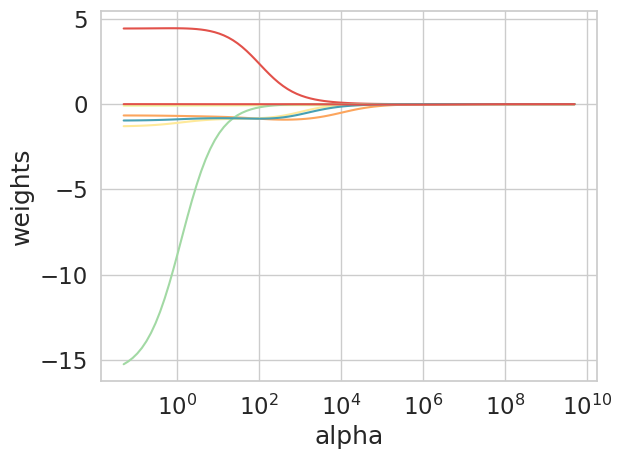

In [79]:
# Entendimiento del parametro de penalizacion!
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

* Mientras el alpha es mas grande, el coeficiente tiende a cero

In [80]:
# Podemos hallar el mejor valor de alpha por CrossValidation
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.87131841e+09, 2.99742125e+09, 2.32079442e+09,
       1.79690683e+09, 1.39127970e+09, 1.07721735e+09, 8.34050269e+08,
       6.45774833e+08, 5.00000000e+08, 3.87131841e+08, 2.99742125e+08,
       2.32079442e+08, 1.79690683e+08, 1.39127970e+08, 1.07721735e+08,
       8.34050269e+07, 6.45774833e+07, 5.00000000e+07, 3.87131841e+07,
       2.99742125e+07, 2.32079442e+0...
       1.79690683e+01, 1.39127970e+01, 1.07721735e+01, 8.34050269e+00,
       6.45774833e+00, 5.00000000e+00, 3.87131841e+00, 2.99742125e+00,
       2.32079442e+00, 1.79690683e+00, 1.39127970e+00, 1.07721735e+00,
       8.34050269e-01, 6.45774833e-01, 5.00000000e-01, 3.87131841e-01,
       2.99742125e-01, 2.32079442e-01, 1.79690683e-01, 1.39127970e-01,
       1.07721735e-01, 8.34050269e-02, 6.45774833e-02, 5.00000000e-02]),
        scoring='neg_mean_squared_error')

In [81]:
ridgecv.alpha_

0.10772173450159434

In [82]:
# Probamos la regresión Rige con el mejor alpha
ridge3 = Ridge(alpha = 0.10772173450159434 )
ridge3.fit(X_train, y_train)             # Ajuste del modelo ridge

Ridge(alpha=0.10772173450159434)

In [83]:
# Obtenemos las predicciones
y_pred_train_ridge = ridge3.predict(X_train)
y_pred_test_ridge = ridge3.predict(X_test)

In [84]:
# Obtenemos las funciones de coste
print ('Error cuadrático medio:')
print('Train:',mean_squared_error(y_train, y_pred_train_ridge))
print('Test:',mean_squared_error(y_test, y_pred_test_ridge),'\n')

print ('Raiz Error cuadrático medio:')
print('Train:',np.sqrt(mean_squared_error(y_train, y_pred_train_ridge)))
print('Test:',np.sqrt(mean_squared_error(y_test, y_pred_test_ridge)),'\n')

print ('R cuadrado:')
print('Train:',r2_score(y_train, y_pred_train_ridge))
print('Test:',r2_score(y_test, y_pred_test_ridge))

Error cuadrático medio:
Train: 26.27579785396458
Test: 21.957196075982527 

Raiz Error cuadrático medio:
Train: 5.125992377478197
Test: 4.685850624591284 

R cuadrado:
Train: 0.7239550905657033
Test: 0.645781066679652


## Regresión Penalizada : Lasso

In [85]:
from sklearn.linear_model import Lasso, LassoCV

In [86]:
# Elegimos el mejor o el valor más óptimo de alpha por Cv
#lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lassocv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000)

In [87]:
# EK mejor alpha
lassocv.alpha_

0.8074186153966639

* si el alpha fuera muygrande, lasso saldria valores muy malos (lasso contrae y elimina)

In [88]:
#lasso = Lasso(alpha= lassocv.alpha_ ,max_iter = 10000, normalize = True)
lasso = Lasso(alpha= lassocv.alpha_ ,max_iter = 10000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.8074186153966639, max_iter=10000)

In [89]:
# Obtenemos las predicciones
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

In [90]:
# Obtenemos las funciones de coste
print ('Error cuadrático medio:')
print('Train:',mean_squared_error(y_train, y_pred_train_lasso))
print('Test:',mean_squared_error(y_test, y_pred_test_lasso),'\n')

print ('Raiz Error cuadrático medio:')
print('Train:',np.sqrt(mean_squared_error(y_train, y_pred_train_lasso)))
print('Test:',np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)),'\n')

print ('R cuadrado:')
print('Train:',r2_score(y_train, y_pred_train_lasso))
print('Test:',r2_score(y_test, y_pred_test_lasso))

Error cuadrático medio:
Train: 29.18161646042596
Test: 23.46154077583869 

Raiz Error cuadrático medio:
Train: 5.402001153315867
Test: 4.84371146703008 

R cuadrado:
Train: 0.6934275138766438
Test: 0.6215126048466753


## XGBoost

In [91]:
from xgboost import XGBRegressor
from sklearn import metrics

In [92]:
model = XGBRegressor()
model.fit(X_train,y_train)
df_prediccion_train = model.predict(X_train)

In [93]:
# R squeared error
score_1=metrics.r2_score(y_train,df_prediccion_train)

# Mean Absolute Error
score_2=metrics.mean_absolute_error(y_train,df_prediccion_train)

print('R squared error: ',score_1)
print('Mean Absolute error: ',score_2)

R squared error:  0.9999959573582407
Mean Absolute error:  0.013614962023619729


**Comparacion Precios actuales y predecidos**

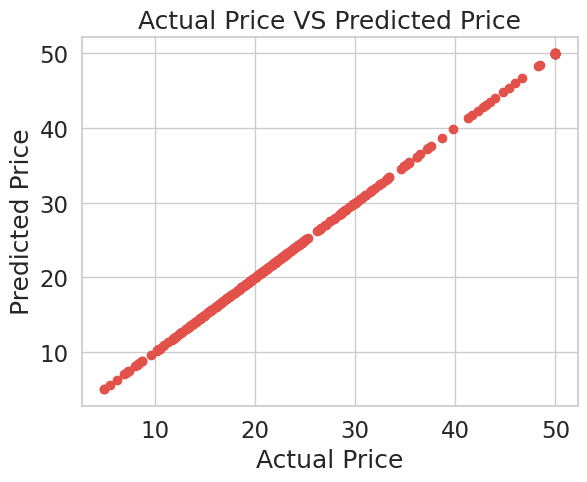

In [94]:
plt.scatter(y_train,df_prediccion_train)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price VS Predicted Price")
plt.show()

In [95]:
# Prediccion (sore la data de prueba)
df_prediccion_test = model.predict(X_test)

In [96]:
# R squeared error
score_1=metrics.r2_score(y_test,df_prediccion_test)

# Mean Absolute Error
score_2=metrics.mean_absolute_error(y_test,df_prediccion_test)

print('R squared error: ',score_1)
print('Mean Absolute error: ',score_2)

R squared error:  0.7830490966662242
Mean Absolute error:  2.405405856035427


## CrossVal

In [103]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

In [104]:
cv = KFold(n_splits = 10, shuffle=True, random_state=1)
cv.get_n_splits(X)
scores = cross_val_score(regtree, X, Y, scoring=make_scorer(mean_squared_error), cv = cv, n_jobs=1)
print(scores)
score = np.mean(scores)
print(score)

[14.21501779 16.62018743 18.48312343 46.22608214 10.25202434 18.39546877
 15.08005674 32.23929702 23.04375075 10.93761052]
20.54926189262014


In [106]:
list(zip(predictors,regtree.feature_importances_))

[('crim', 0.03218453342569601),
 ('zn', 0.0),
 ('indus', 0.0),
 ('nox', 0.016195328299150734),
 ('rm', 0.6341876193016506),
 ('edad', 0.01416527165061268),
 ('dis', 0.0),
 ('rad', 0.0),
 ('impuesto', 0.0),
 ('ptratio', 0.00962045819637979),
 ('negro', 0.0),
 ('lstat', 0.2936467891265102)]

* La variable mas importante es rm, seguida de lstat